# Skład grupy:
## Paweł Awramiuk
## Anna Chojnowska
## Piotr Grusza
## Szymon Leszczyński

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn import neighbors

In [2]:
data_ALL = pd.read_csv("data_ALL.csv")
data_ALL.drop(columns=['Unnamed: 0'], inplace=True)
data_ALL

squareMeters     rooms     floor  floorCount  buildYear  latitude  \
0         -0.586083 -0.740848  0.144321    0.637270   0.998324 -1.458914   
1         -0.824275 -0.740848 -0.584870   -0.732352   0.998324 -1.457078   
2          0.783521  0.553680  0.144321   -1.188893  -0.018122 -1.427091   
3          1.021713  0.553680  0.144321   -0.275811  -0.018122 -1.462786   
4         -0.115654 -0.740848 -1.314060   -1.188893  -0.018122 -1.410468   
...             ...       ...       ...         ...        ...       ...   
35075      2.510413  0.553680  0.144321   -0.732352  -2.465123  1.051293   
35076      2.093577  1.848208 -0.584870   -1.188893   0.923032  1.055351   
35077      2.230537  1.848208  0.144321   -1.188893  -2.013369  1.048507   
35078      2.290085  1.848208  0.144321   -1.188893   0.283047  1.044252   
35079     -0.340745 -0.740848 -1.314060   -1.645434   0.057170  1.055325   

       longitude  centreDistance  poiCount  hasParkingSpace  ...  \
0       0.104722        0.569461 -0.783724                0  ...   
1       0.114647        0.256607 -0.878584                0  ...   
2       0.129172       -1.431261  0.734028                0  ...   
3       0.178690        1.102472 -0.499146                0  ...   
4       0.133610       -1.095232  2.062062                1  ...   
...          ...             ...       ...              ...  ...   
35075  -1.066714       -1.539408  3.295236                0  ...   
35076  -1.045404       -0.639469 -0.119707                1  ...   
35077  -1.076651       -1.550995  1.398045                0  ...   
35078  -1.099131       -0.593120 -0.499146                0  ...   
35079  -1.069560       -1.427398  2.631219                1  ...   

       city_katowice  city_krakow  city_lodz  city_lublin  city_poznan  \
0                  0            1          0            0            0   
1                  0            1          0            0            0   
2                  0            1          0            0            0   
3                  0            1          0            0            0   
4                  0            1          0            0            0   
...              ...          ...        ...          ...          ...   
35075              0            0          0            0            0   
35076              0            0          0            0            0   
35077              0            0          0            0            0   
35078              0            0          0            0            0   
35079              0            0          0            0            0   

       city_radom  city_rzeszow  city_szczecin  city_warszawa  city_wroclaw  
0               0             0              0              0             0  
1               0             0              0              0             0  
2               0             0              0              0             0  
3               0             0              0              0             0  
4               0             0              0              0             0  
...           ...           ...            ...            ...           ...  
35075           0             0              0              0             0  
35076           0             0              0              0             0  
35077           0             0              0              0             0  
35078           0             0              0              0             0  
35079           0             0              0              0             0  

[35080 rows x 33 columns]

In [3]:
def mean_percent_error(model, data_X, data_y):
    err_sum = 0.0
    for i in range(len(data_X)):
        X = data_X[i].reshape(1, -1)  # one-item batch
        y = data_y[i]
        pred = model.predict(X)       # predicted income
        err_sum +=abs((y - pred) / y)
    err_sum /= len(data_y)
    return err_sum

def mean_abs_error(model, data_X, data_y):
    err_sum = 0.0
    for i in range(len(data_X)):
        X = data_X[i].reshape(1, -1)  # one-item batch
        y = data_y[i]
        pred = model.predict(X)       # predicted income
        err_sum +=abs(y - pred)
    err_sum /= len(data_y)
    return err_sum

In [4]:
features = data_ALL
labels = features.pop('price')

features = features.to_numpy()
labels = labels.to_numpy()

# Kernel Ridge

------------------------------------------------------------------------
Training for fold 1 ...


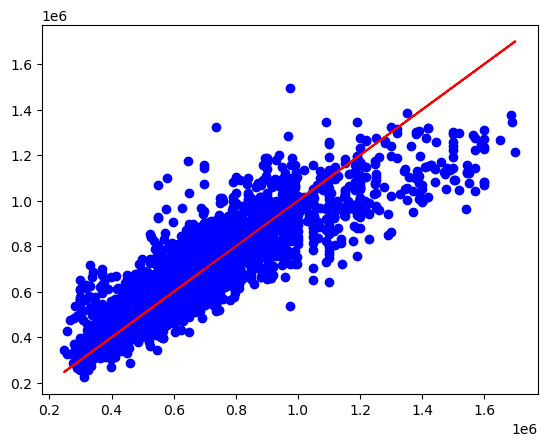

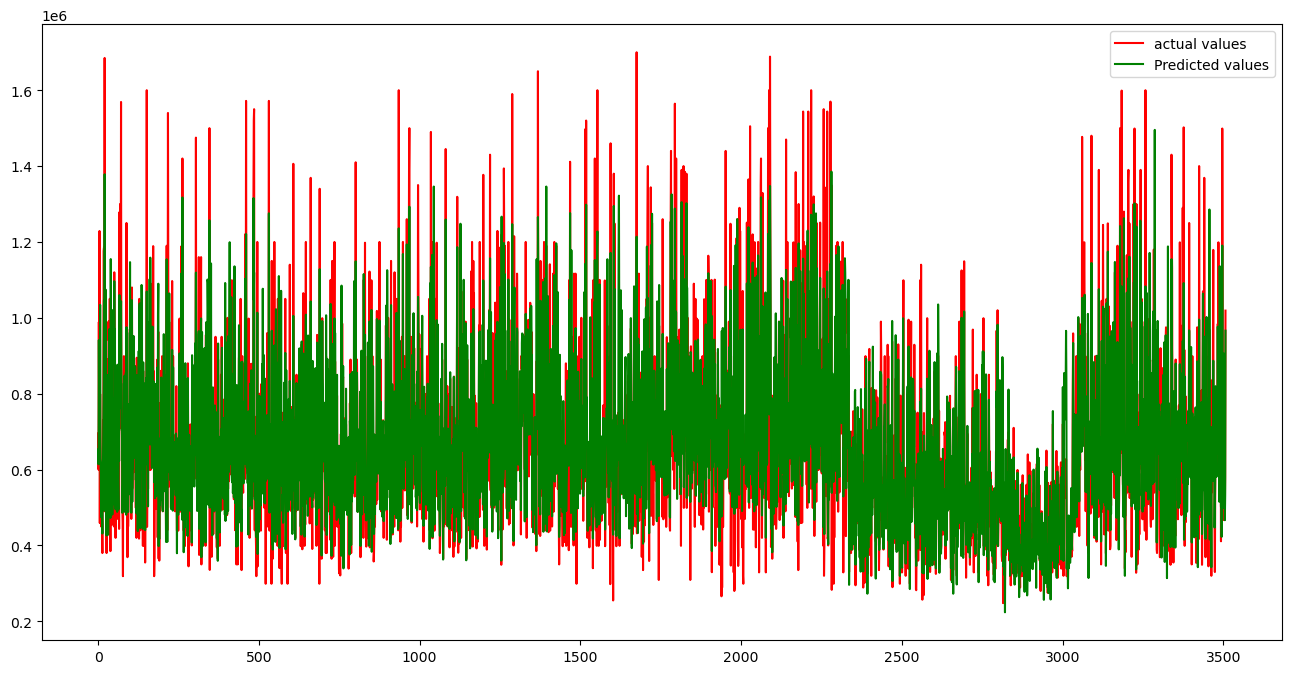

------------------------------------------------------------------------
Training for fold 2 ...


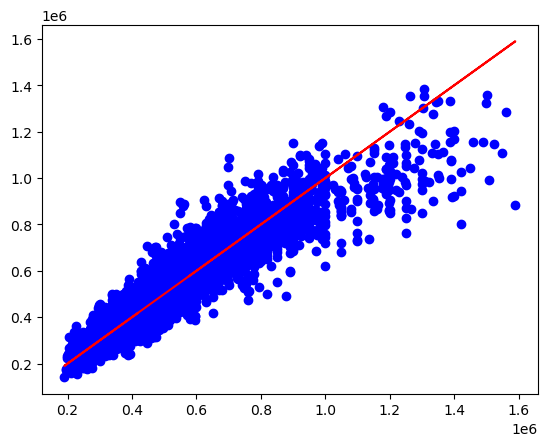

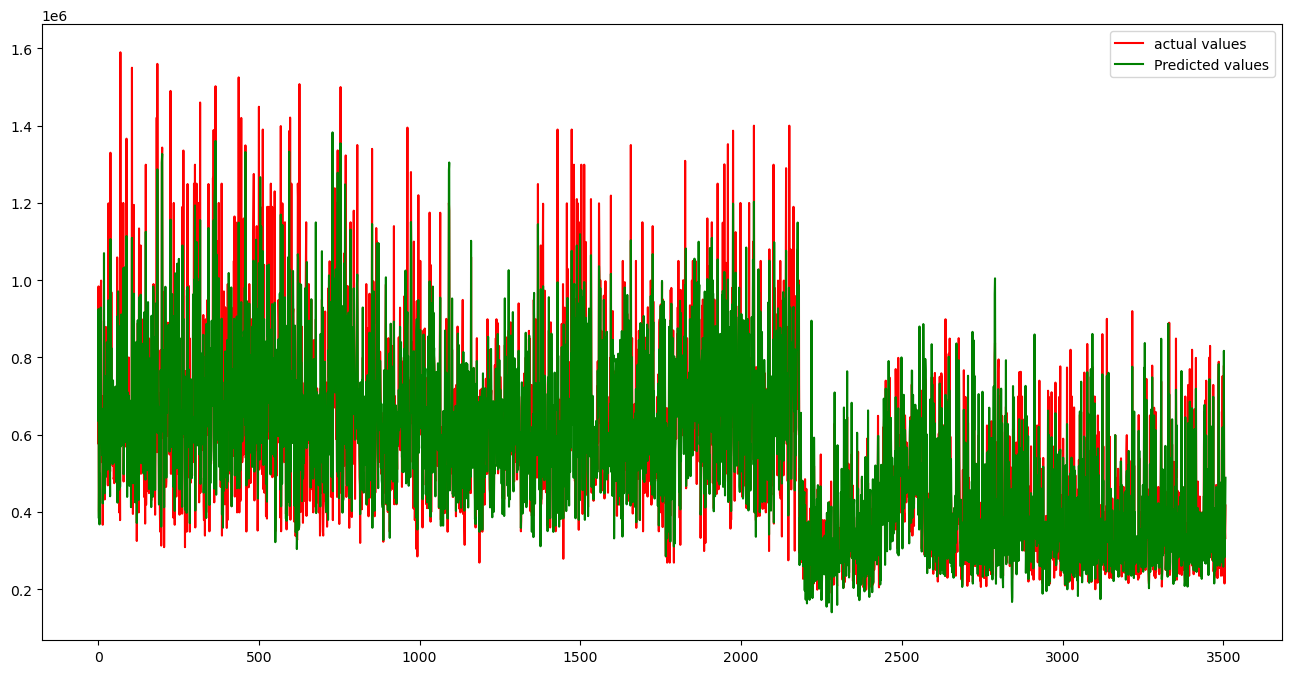

------------------------------------------------------------------------
Training for fold 3 ...


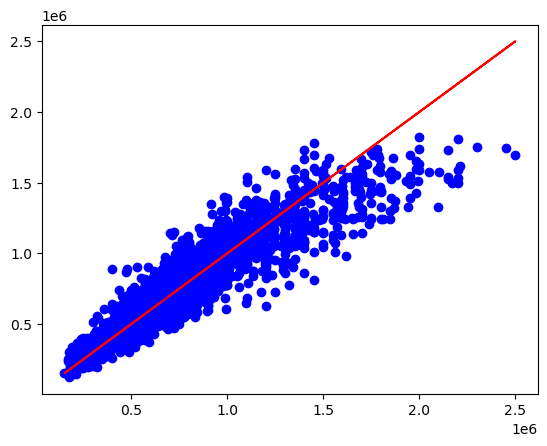

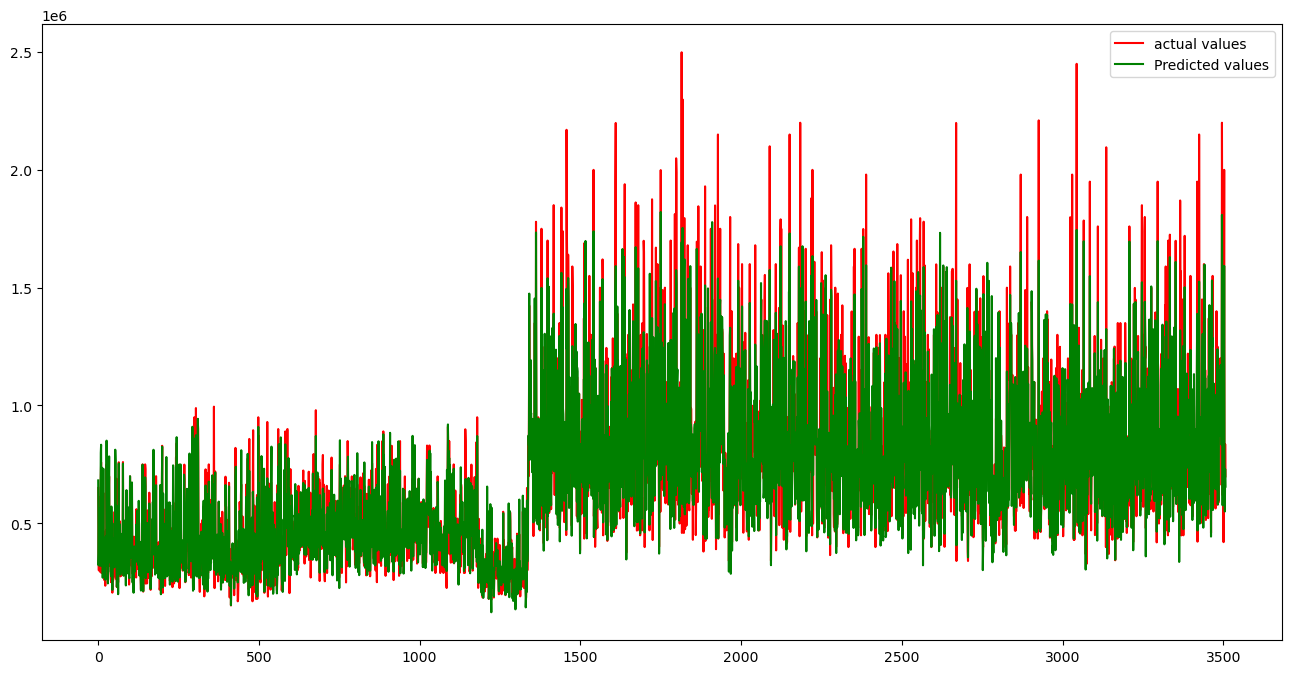

------------------------------------------------------------------------
Training for fold 4 ...


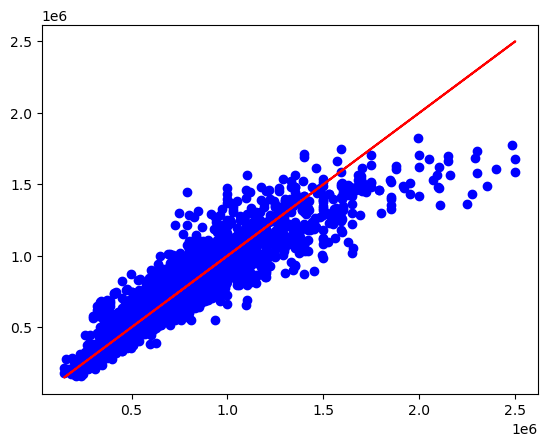

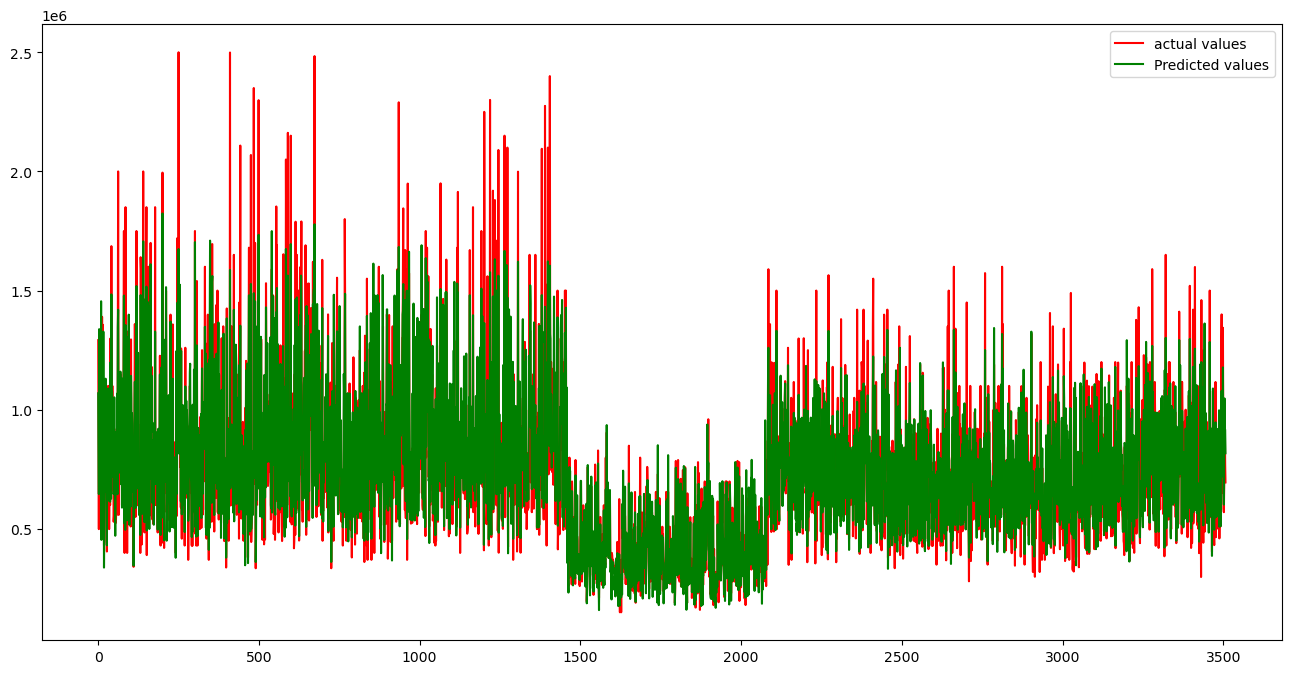

------------------------------------------------------------------------
Training for fold 5 ...


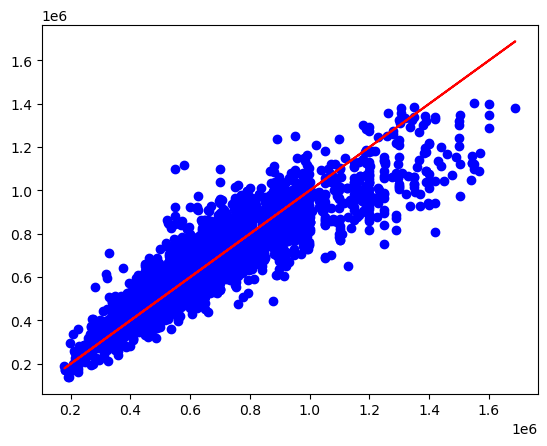

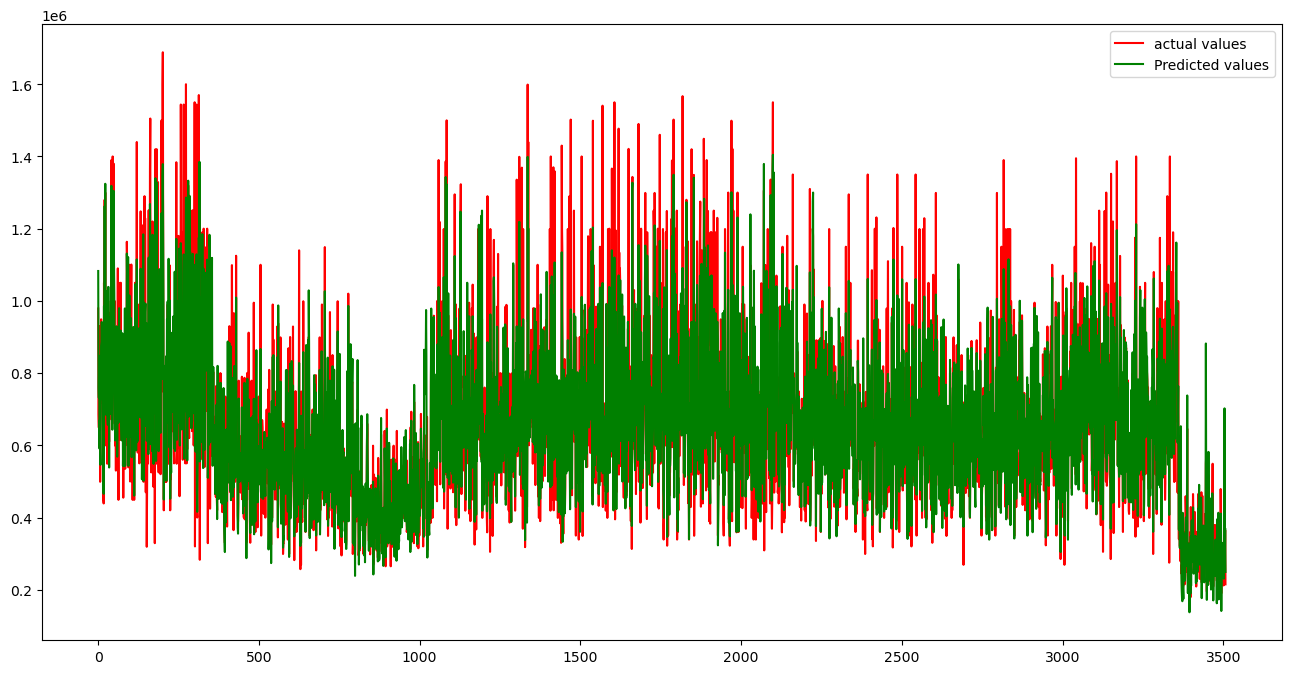

------------------------------------------------------------------------
Training for fold 6 ...


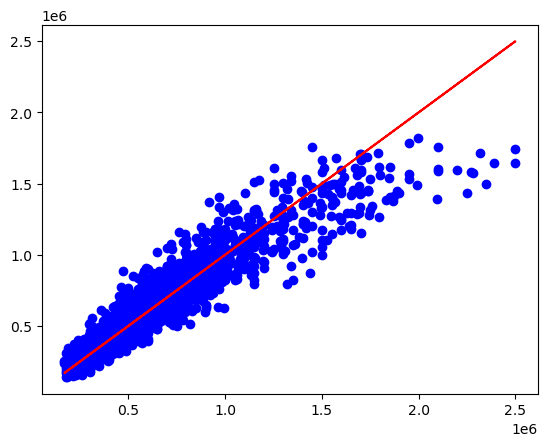

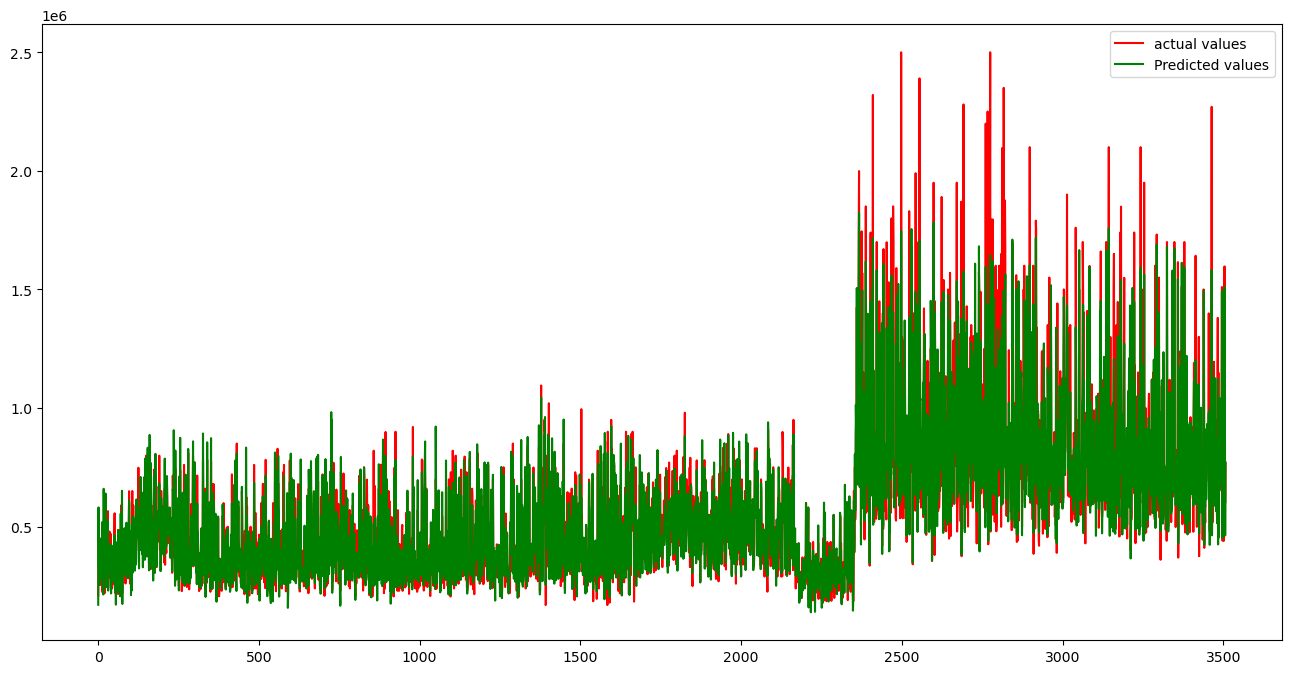

------------------------------------------------------------------------
Training for fold 7 ...


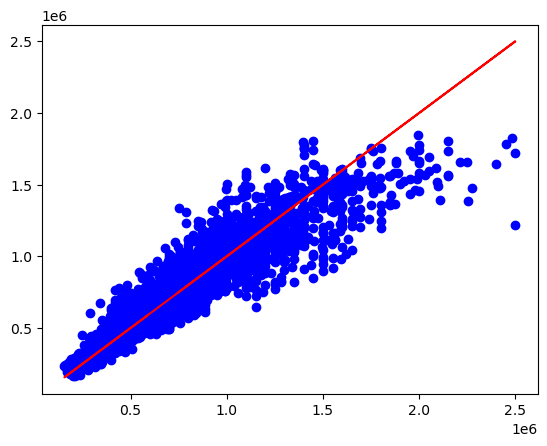

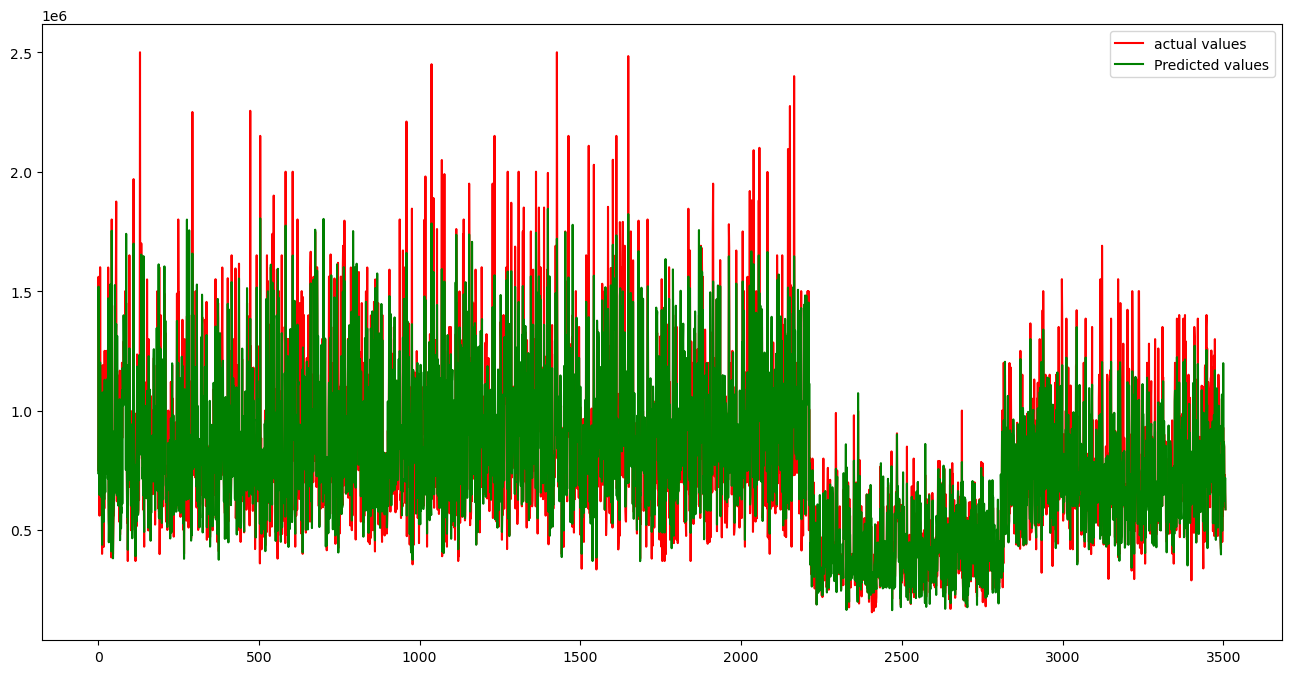

------------------------------------------------------------------------
Training for fold 8 ...


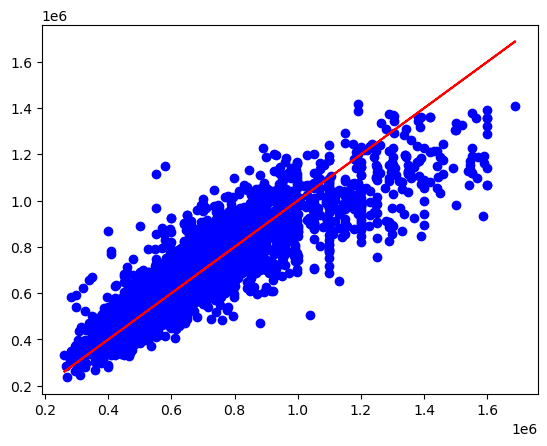

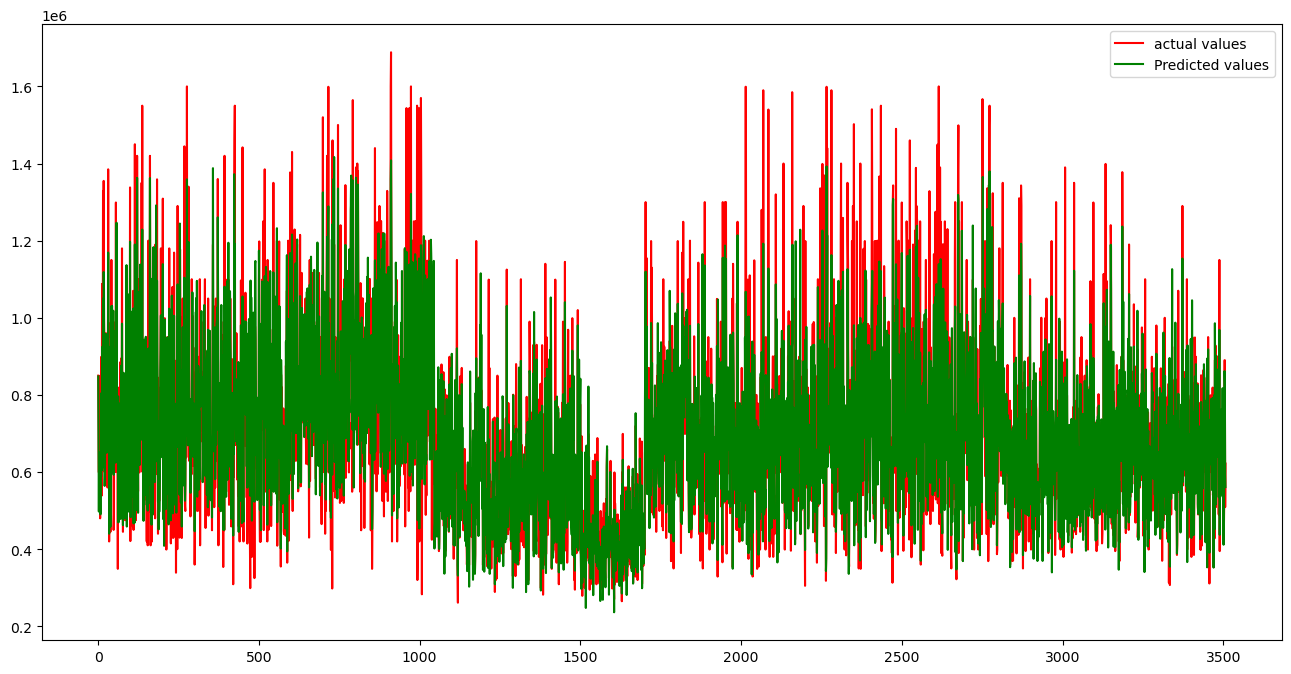

------------------------------------------------------------------------
Training for fold 9 ...


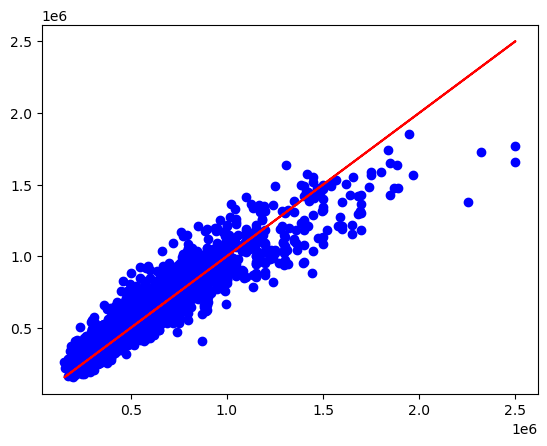

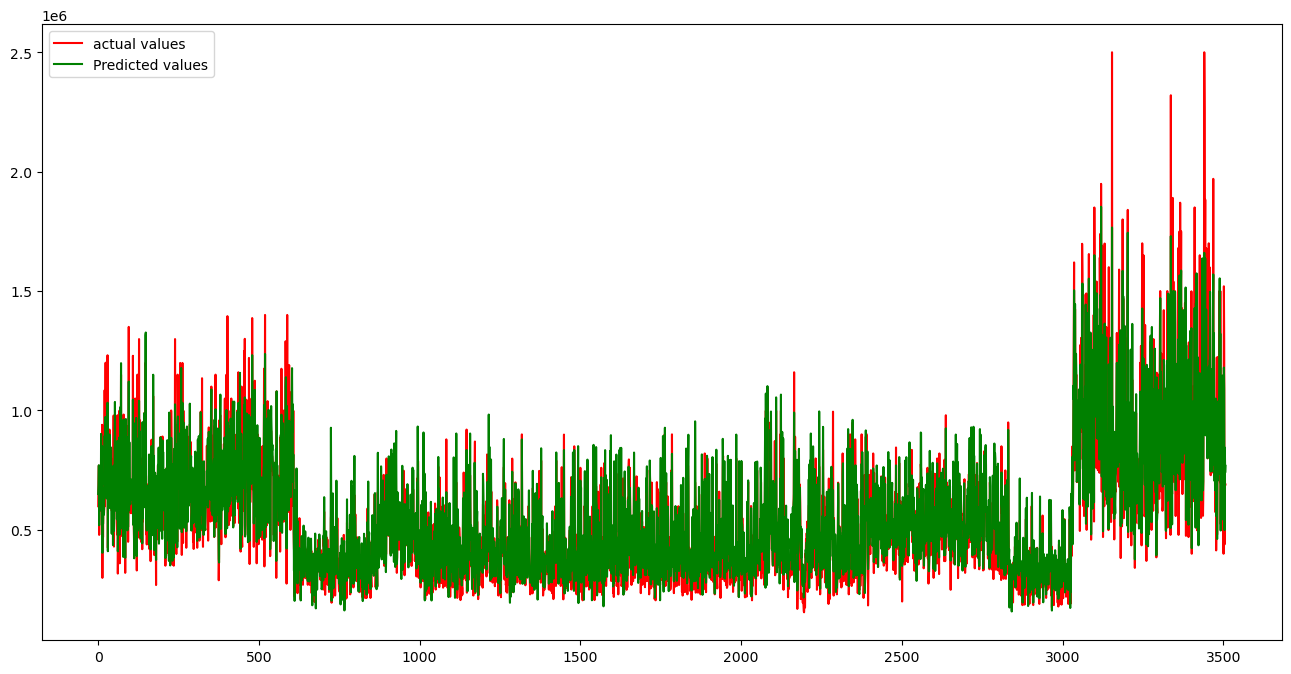

------------------------------------------------------------------------
Training for fold 10 ...


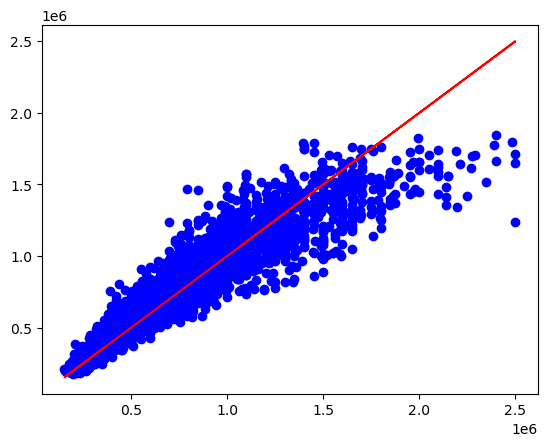

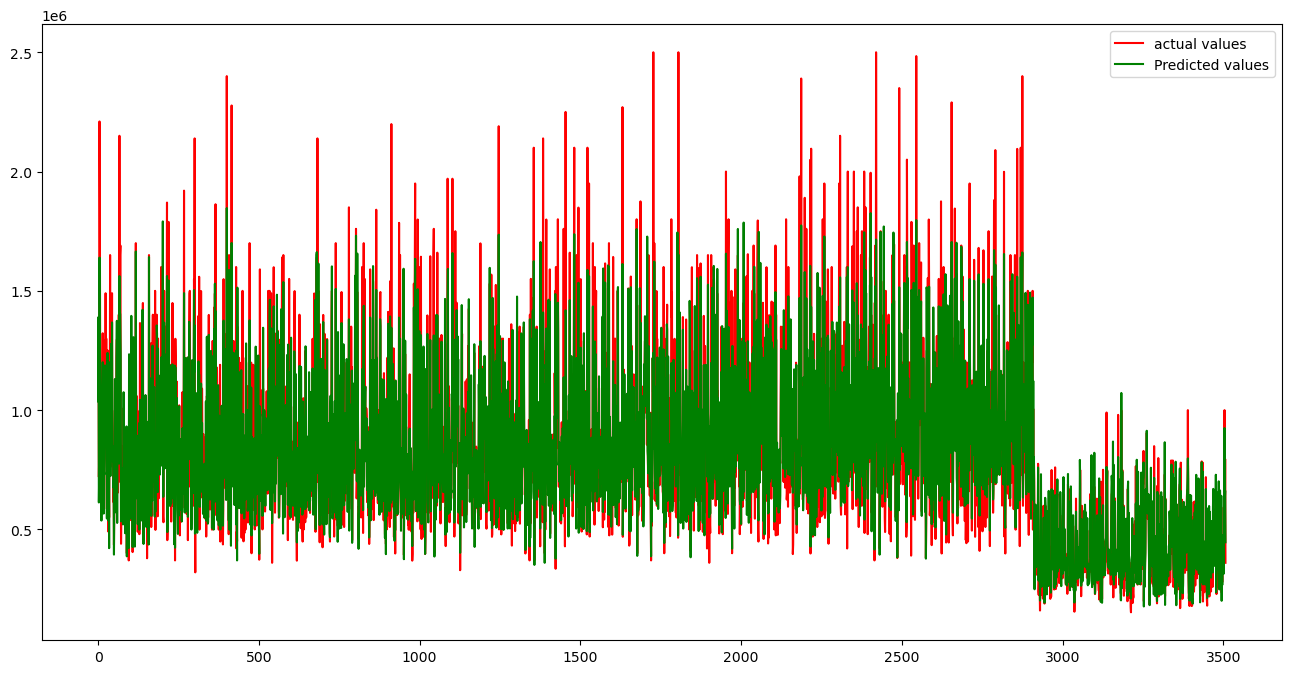

In [5]:
kfold = KFold(n_splits=10)
fold_no = 1
stats = []
for train, test in kfold.split(features, labels):
    model = KernelRidge(kernel='laplacian')
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    model.fit(features[train], labels[train])
    preds_house = model.predict(features[test])
    stats.append([mean_percent_error(model, features[test], labels[test])[0], mean_abs_error(model, features[test], labels[test])[0]])
    plt.plot(labels[test], preds_house, 'bo')
    plt.plot(labels[test], labels[test], 'r-')
    plt.show()
    # fitting the size of the plot
    plt.figure(figsize=(16, 8))
    # plotting the graphs
    plt.plot([i for i in range(len(test))],labels[test], label="actual values", c='r')
    plt.plot([i for i in range(len(test))],preds_house, label="Predicted values", c='g')
    # showing the plotting
    plt.legend()
    plt.show()
    fold_no = fold_no + 1

In [6]:
stats_df = pd.DataFrame(stats)
stats_df

0              1
0  0.121856   79180.502390
1  0.117334   66330.477183
2  0.121926   86442.760512
3  0.121442   89086.009406
4  0.115641   76213.279562
5  0.122783   70553.151687
6  0.123737   98915.469354
7  0.117149   82402.813786
8  0.141790   70962.056380
9  0.127008  103459.415114

In [7]:
stats_df.describe()

0              1
count  10.000000      10.000000
mean    0.123067   82354.593537
std     0.007417   12271.603740
min     0.115641   66330.477183
25%     0.118361   72274.862176
50%     0.121891   80791.658088
75%     0.123498   88425.197182
max     0.141790  103459.415114

# Decision trees

------------------------------------------------------------------------
Training for fold 1 ...


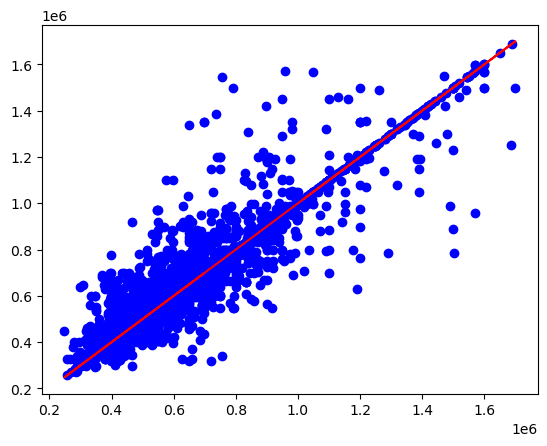

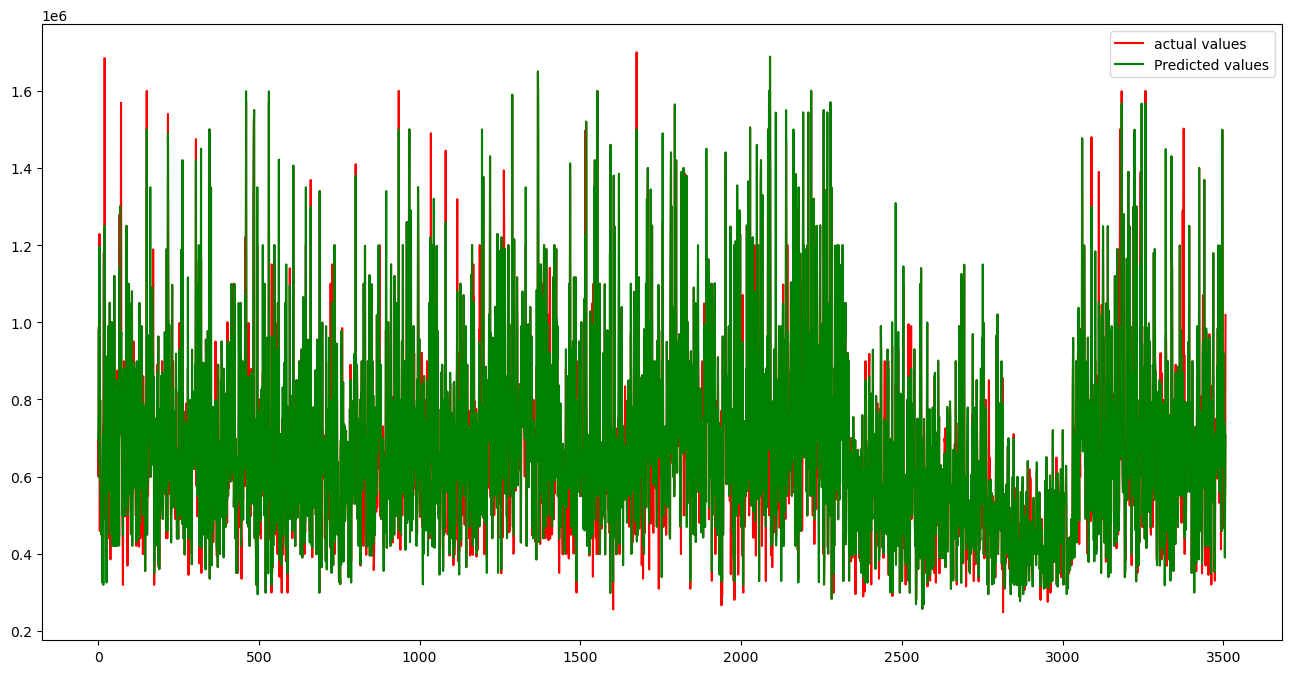

------------------------------------------------------------------------
Training for fold 2 ...


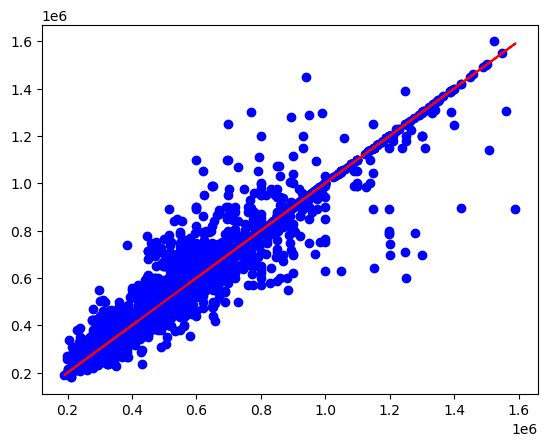

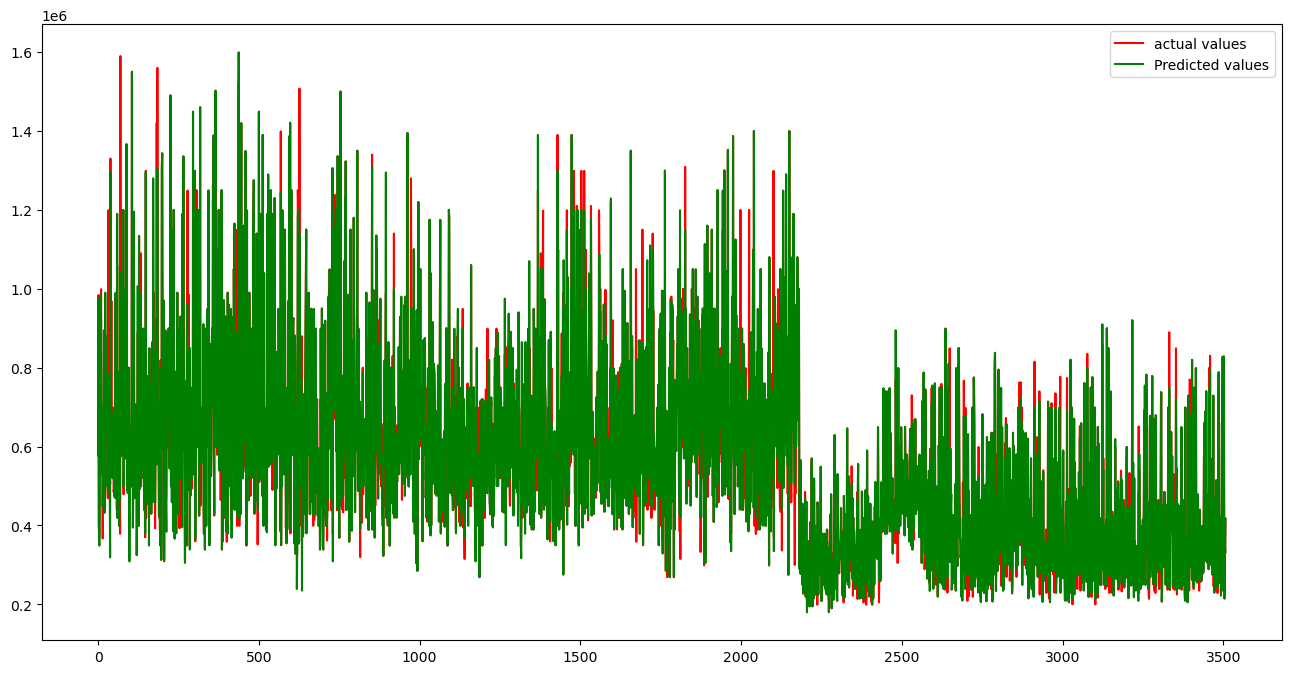

------------------------------------------------------------------------
Training for fold 3 ...


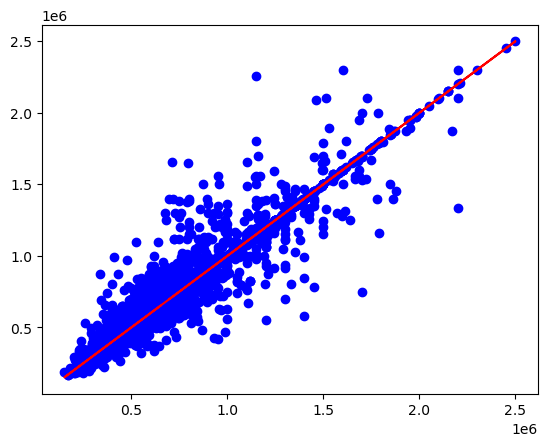

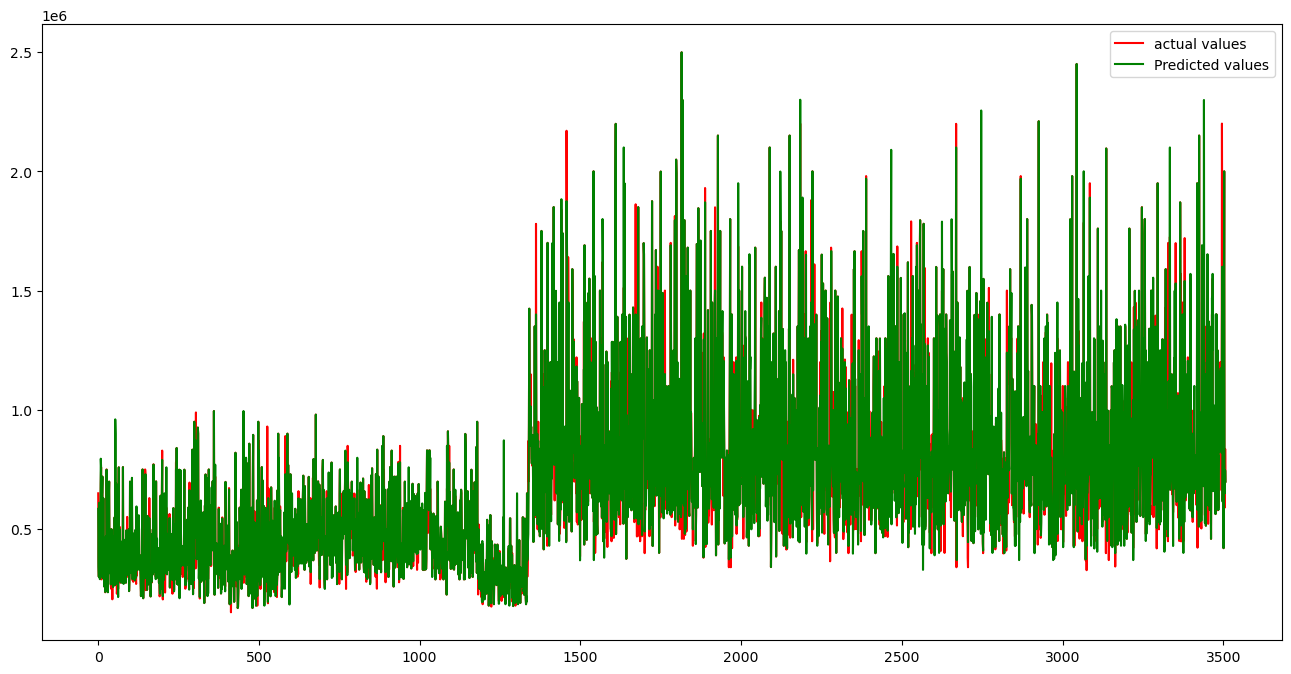

------------------------------------------------------------------------
Training for fold 4 ...


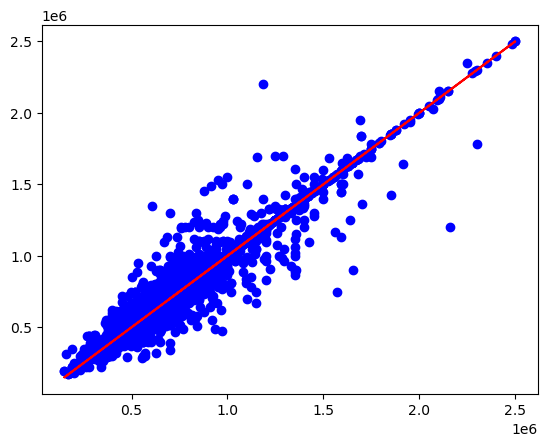

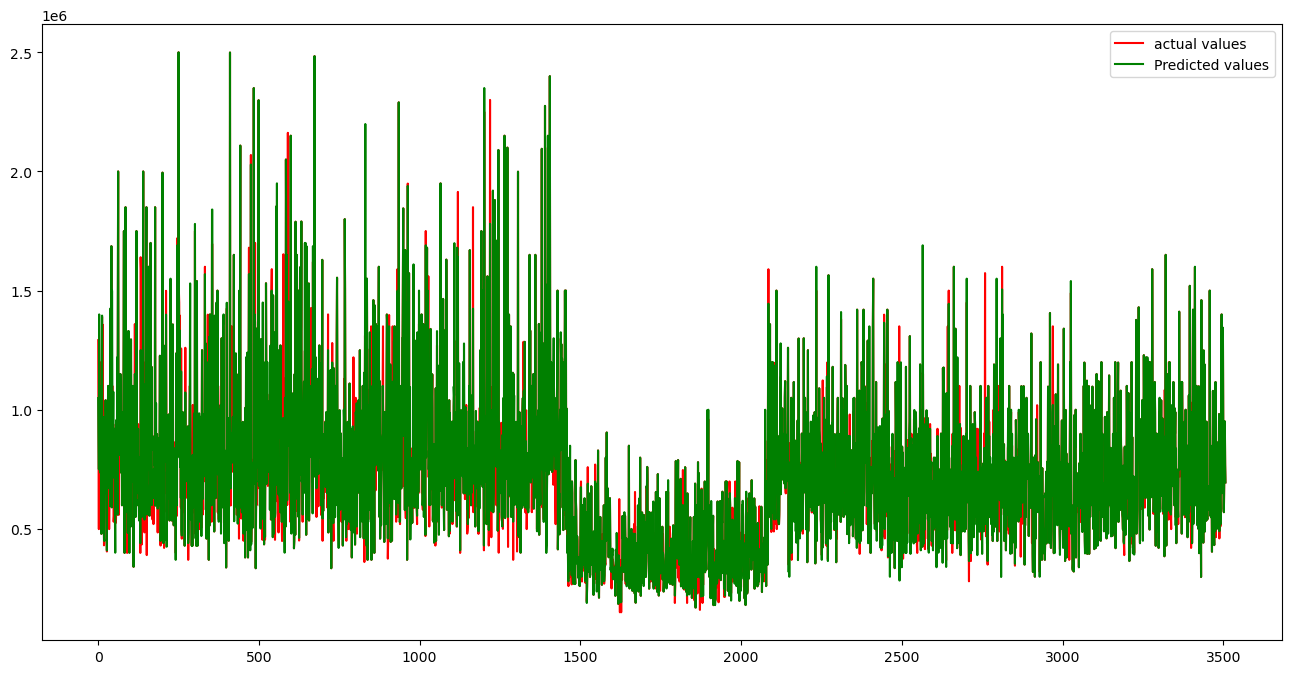

------------------------------------------------------------------------
Training for fold 5 ...


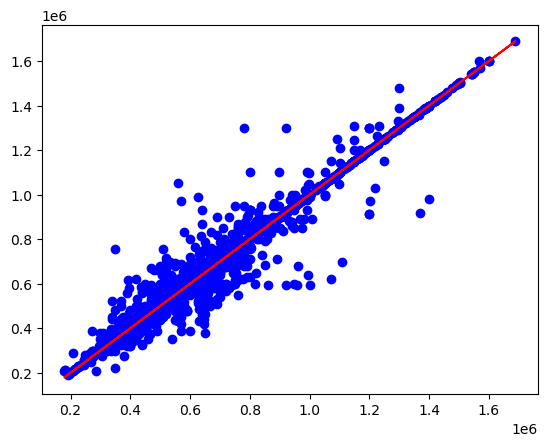

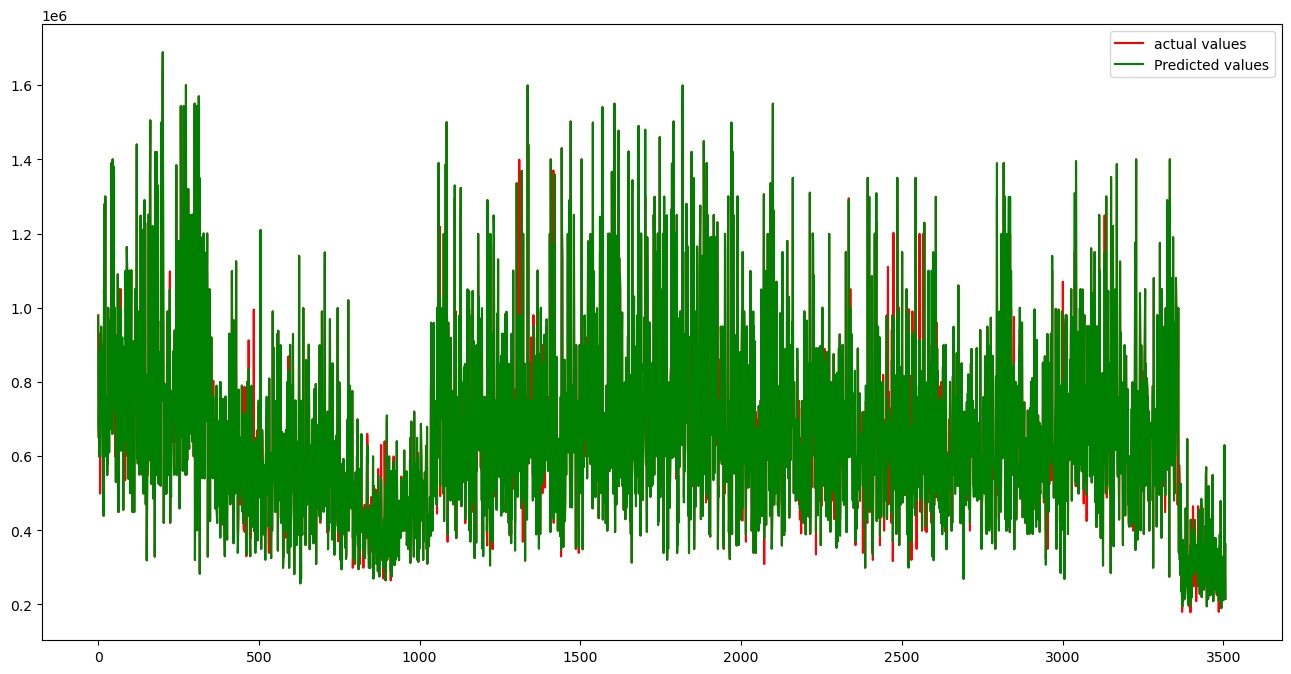

------------------------------------------------------------------------
Training for fold 6 ...


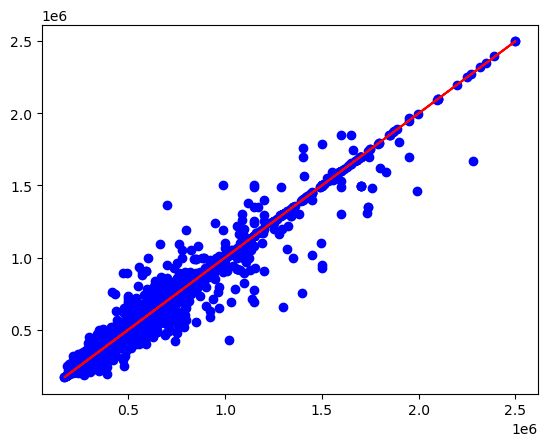

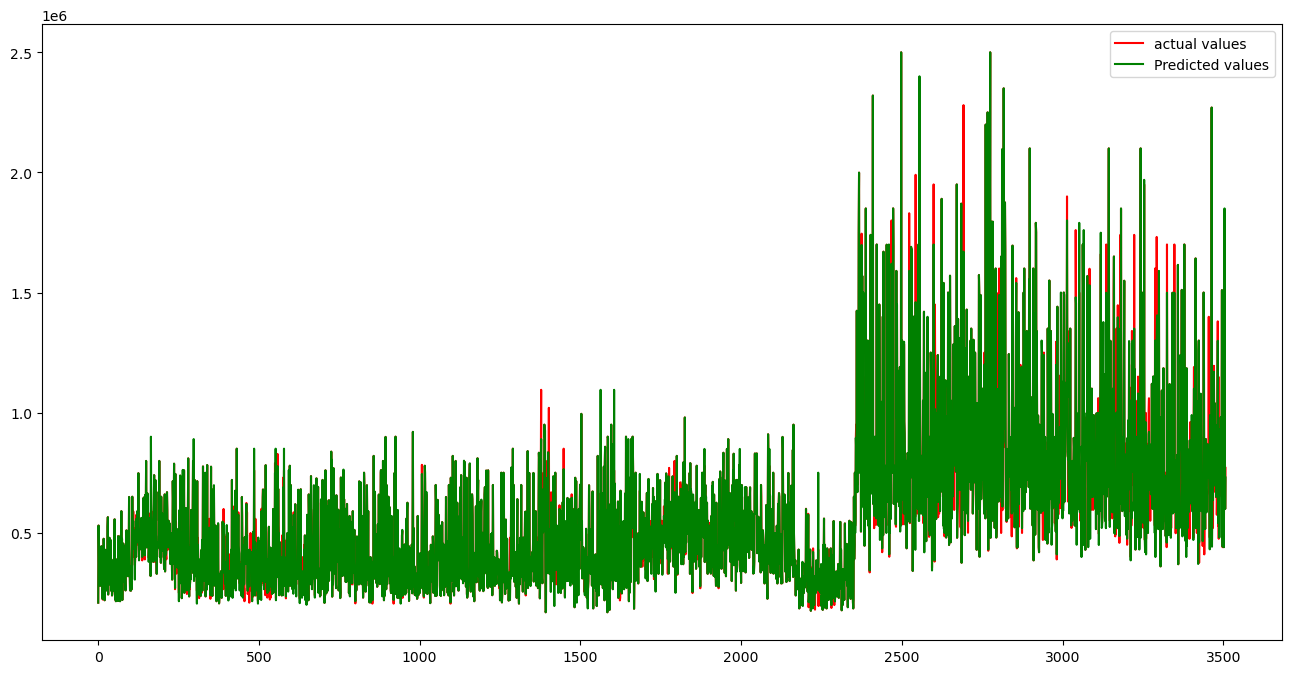

------------------------------------------------------------------------
Training for fold 7 ...


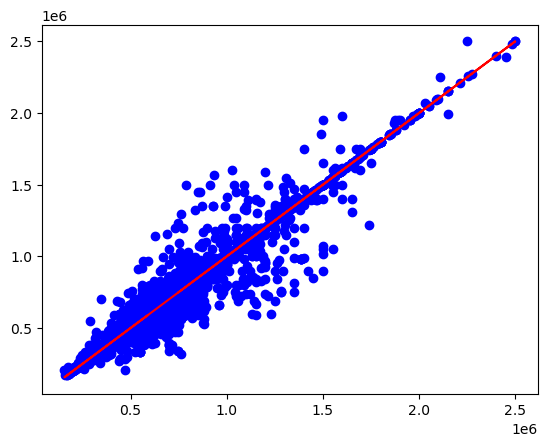

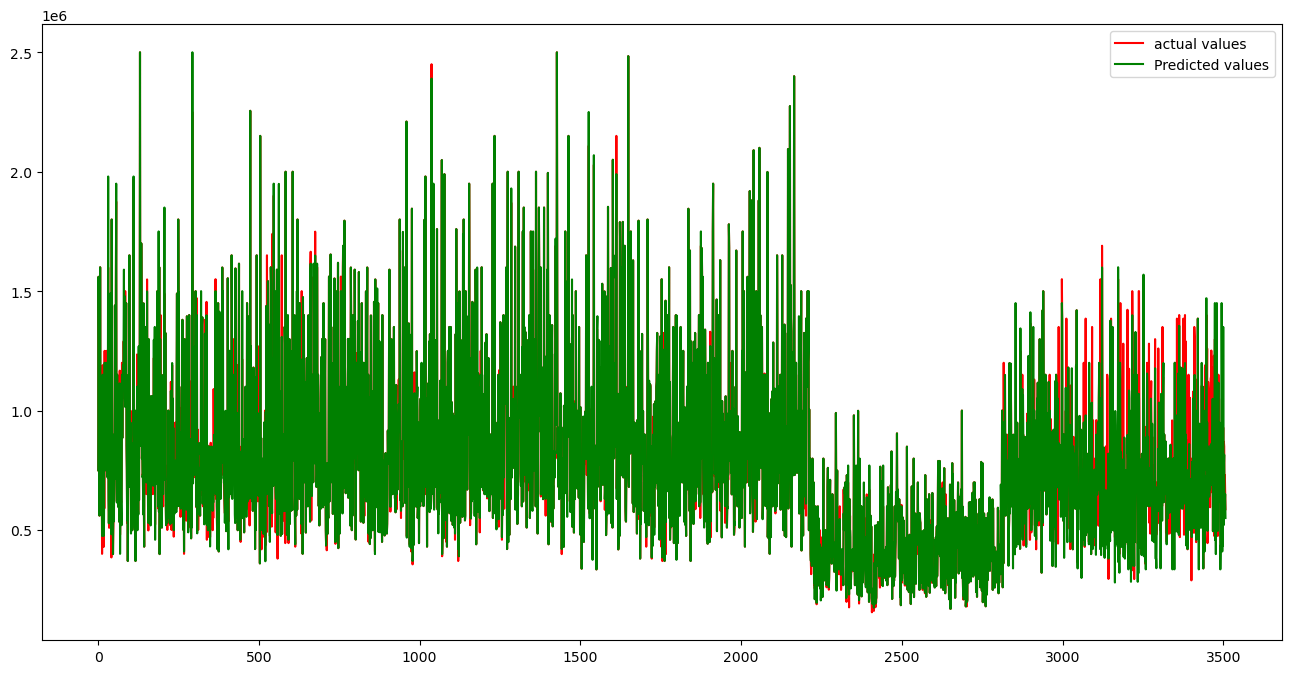

------------------------------------------------------------------------
Training for fold 8 ...


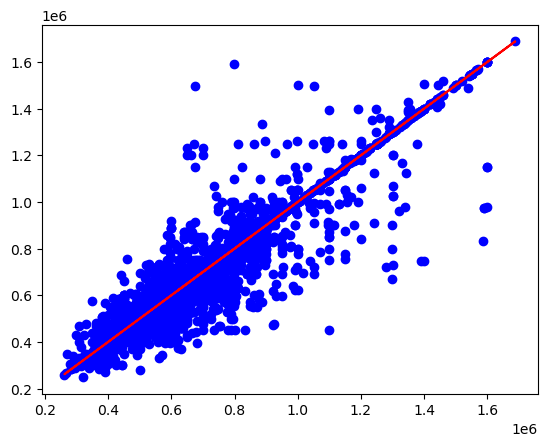

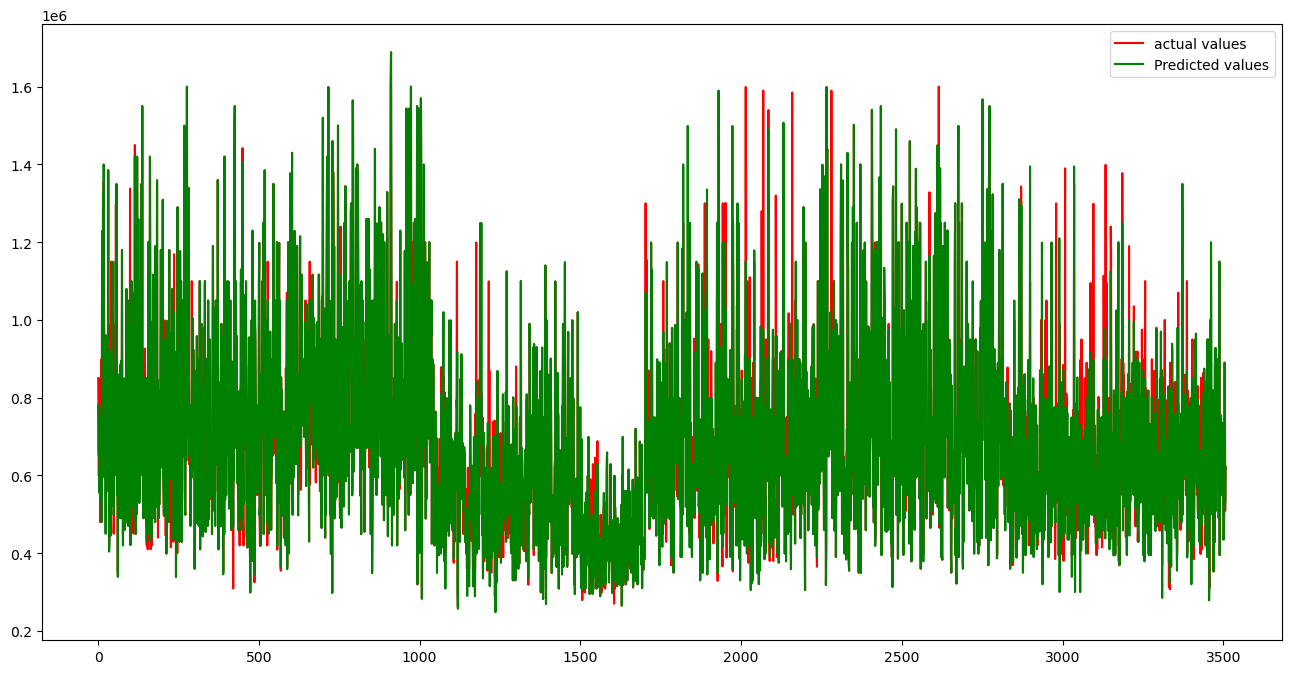

------------------------------------------------------------------------
Training for fold 9 ...


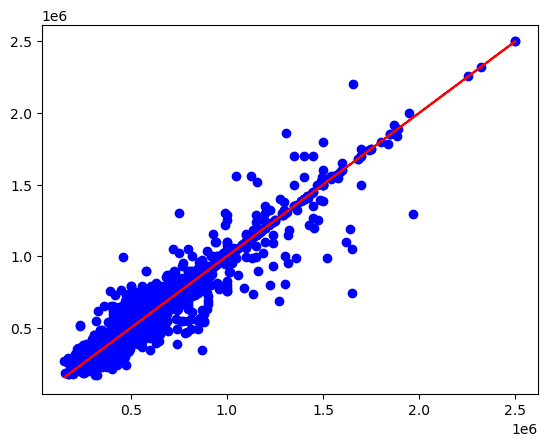

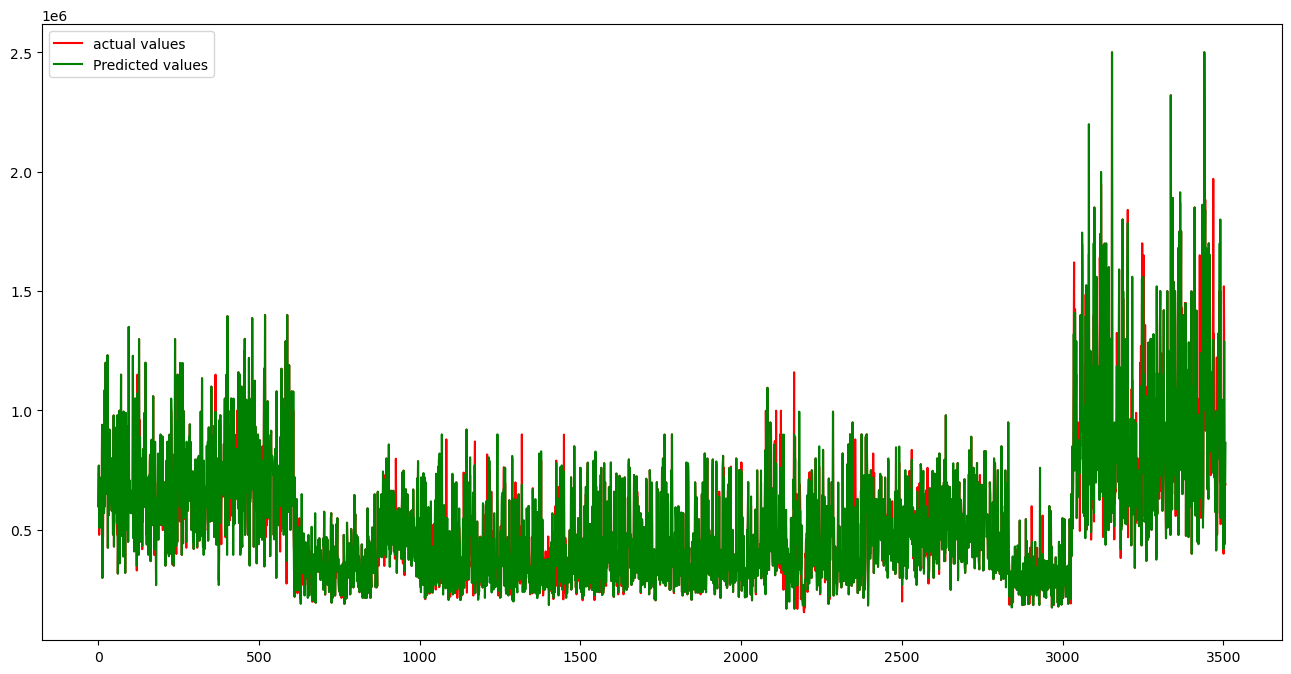

------------------------------------------------------------------------
Training for fold 10 ...


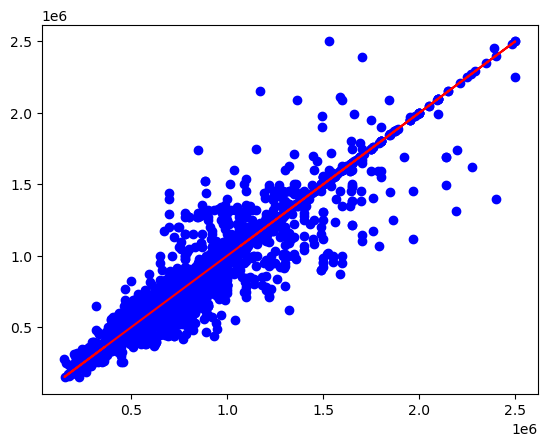

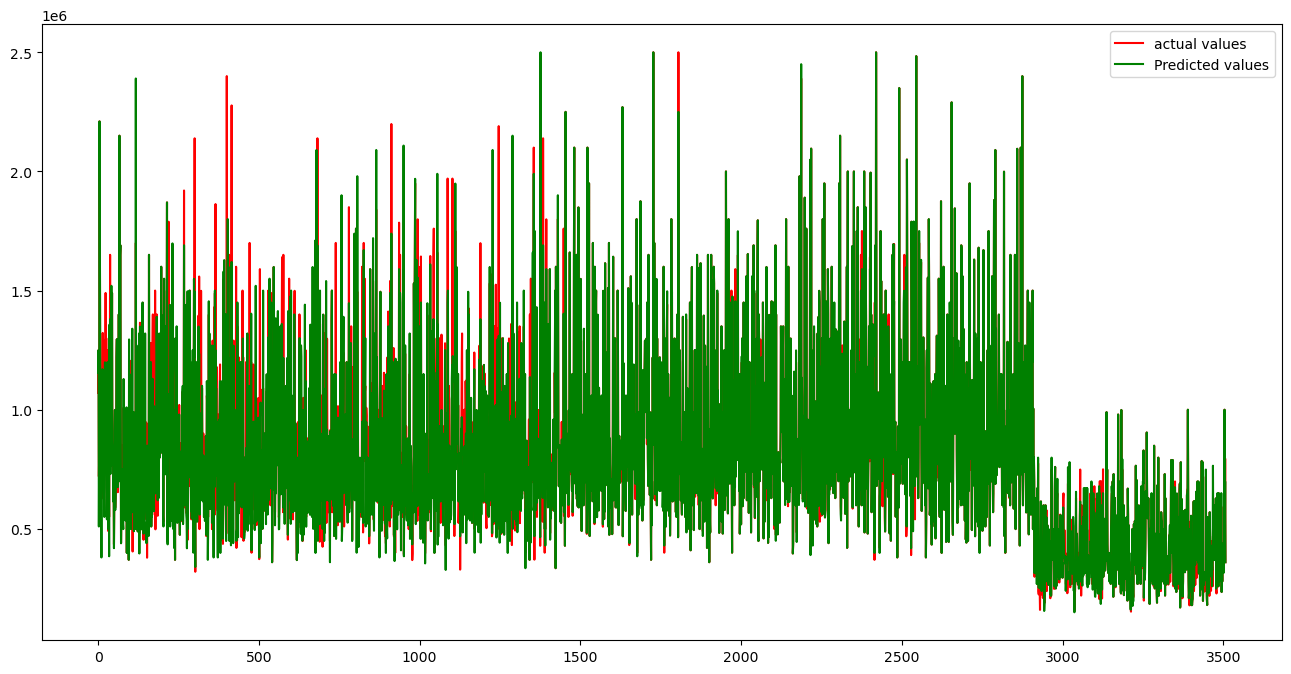

In [8]:
fold_no = 1
stats = []
for train, test in kfold.split(features, labels):
    model = tree.DecisionTreeRegressor(criterion = 'friedman_mse')
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    model.fit(features[train], labels[train])
    preds_house = model.predict(features[test])
    stats.append([mean_percent_error(model, features[test], labels[test])[0], mean_abs_error(model, features[test], labels[test])[0]])
    plt.plot(labels[test], preds_house, 'bo')
    plt.plot(labels[test], labels[test], 'r-')
    plt.show()
    # fitting the size of the plot
    plt.figure(figsize=(16, 8))
    # plotting the graphs
    plt.plot([i for i in range(len(test))],labels[test], label="actual values", c='r')
    plt.plot([i for i in range(len(test))],preds_house, label="Predicted values", c='g')
    # showing the plotting
    plt.legend()
    plt.show()
    fold_no = fold_no + 1

In [9]:
stats_df = pd.DataFrame(stats)
stats_df

0             1
0  0.069948  42246.895525
1  0.059824  31810.149373
2  0.073255  49467.564424
3  0.054780  37330.566847
4  0.025192  15288.026511
5  0.036132  22298.128658
6  0.049765  37699.149943
7  0.061919  42399.214510
8  0.055947  29400.163911
9  0.069926  56810.364168

In [10]:
stats_df.describe()

0             1
count  10.000000     10.000000
mean    0.055669  36475.022387
std     0.015344  12358.807310
min     0.025192  15288.026511
25%     0.051018  30002.660277
50%     0.057885  37514.858395
75%     0.067924  42361.134763
max     0.073255  56810.364168

# Nearest neighbors regression

------------------------------------------------------------------------
Training for fold 1 ...


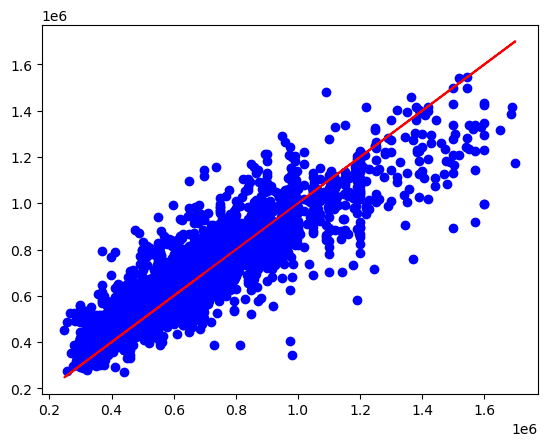

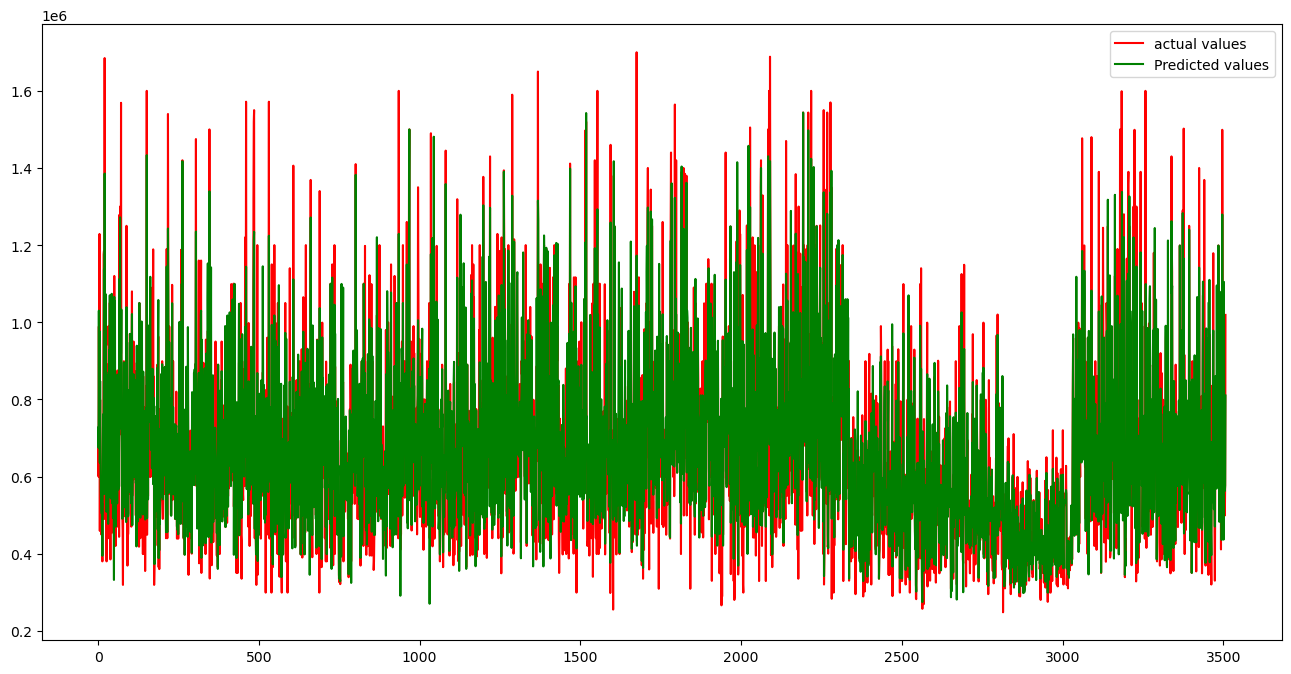

------------------------------------------------------------------------
Training for fold 2 ...


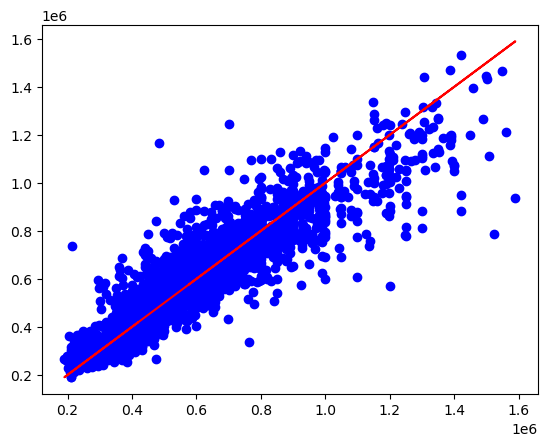

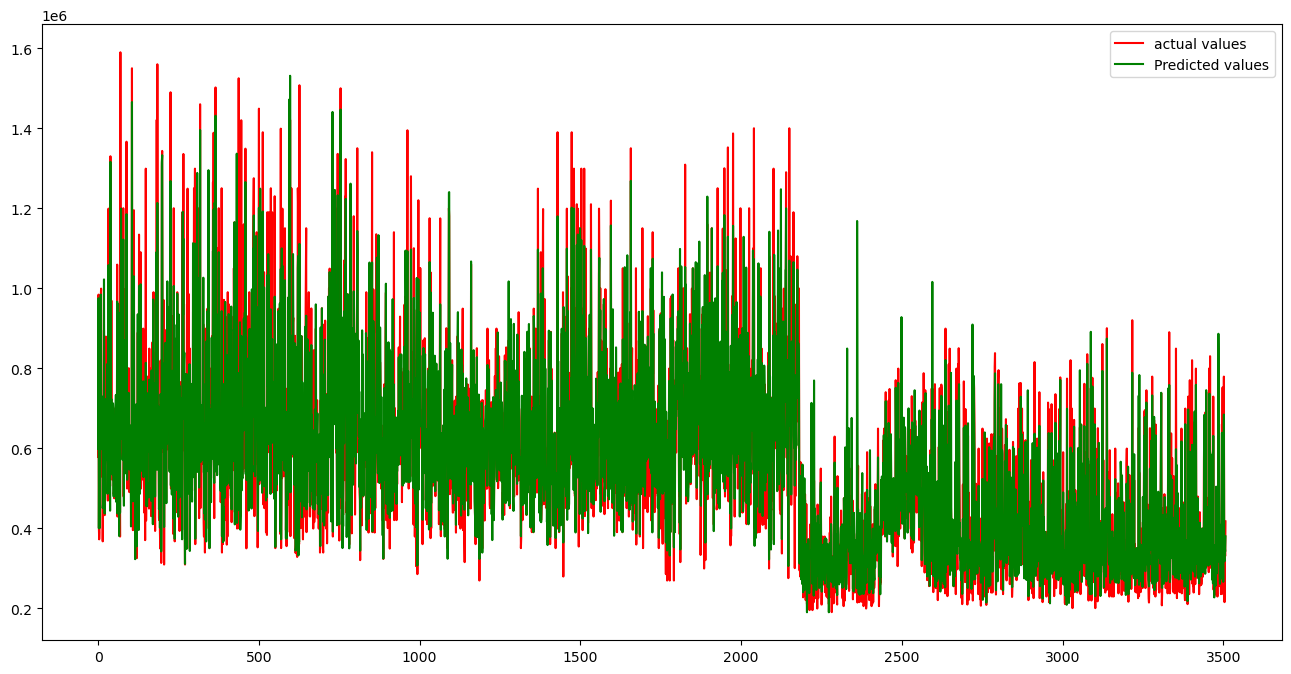

------------------------------------------------------------------------
Training for fold 3 ...


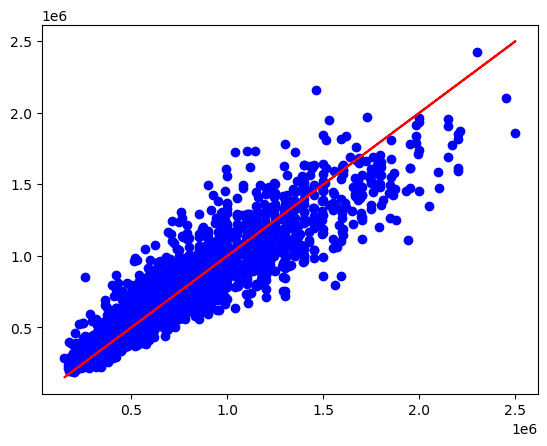

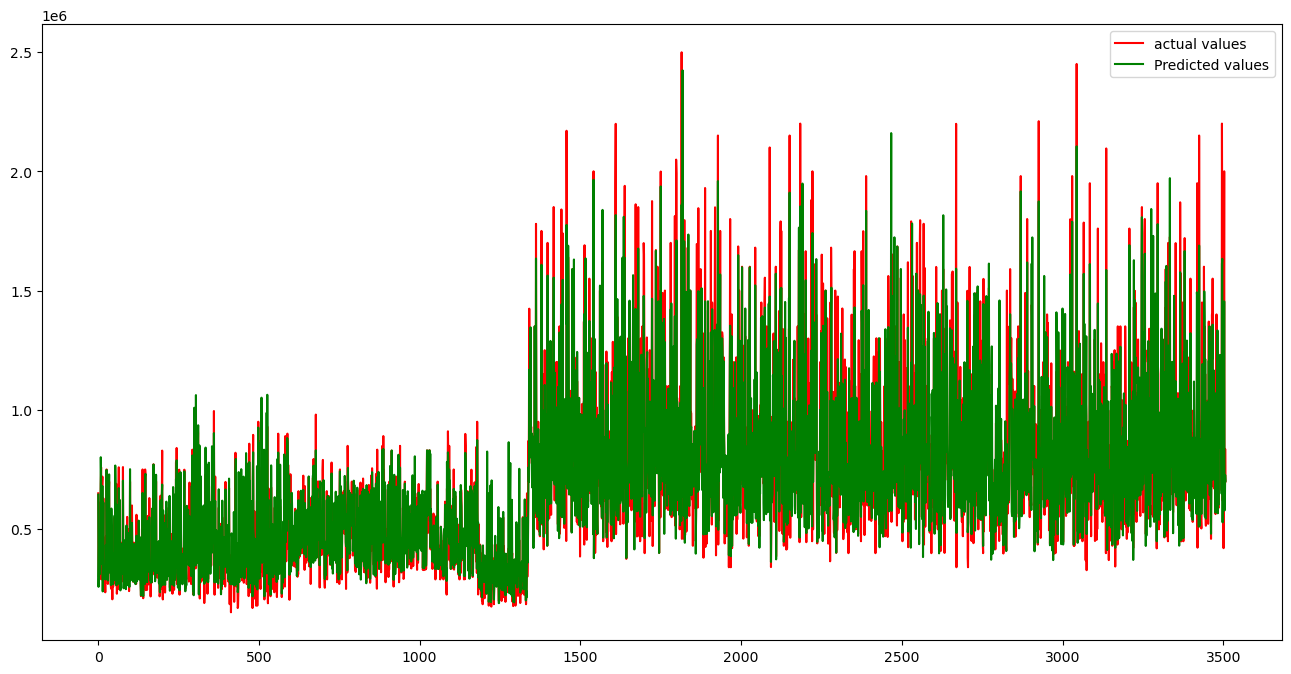

------------------------------------------------------------------------
Training for fold 4 ...


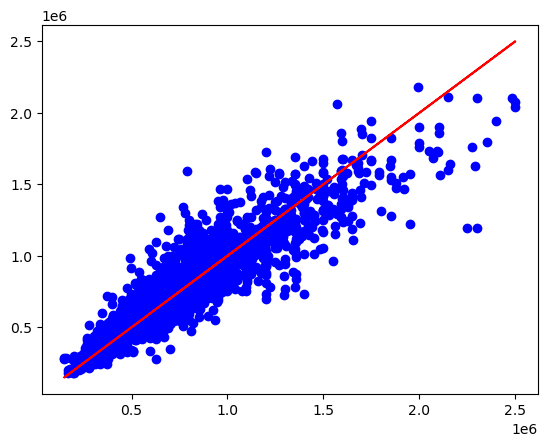

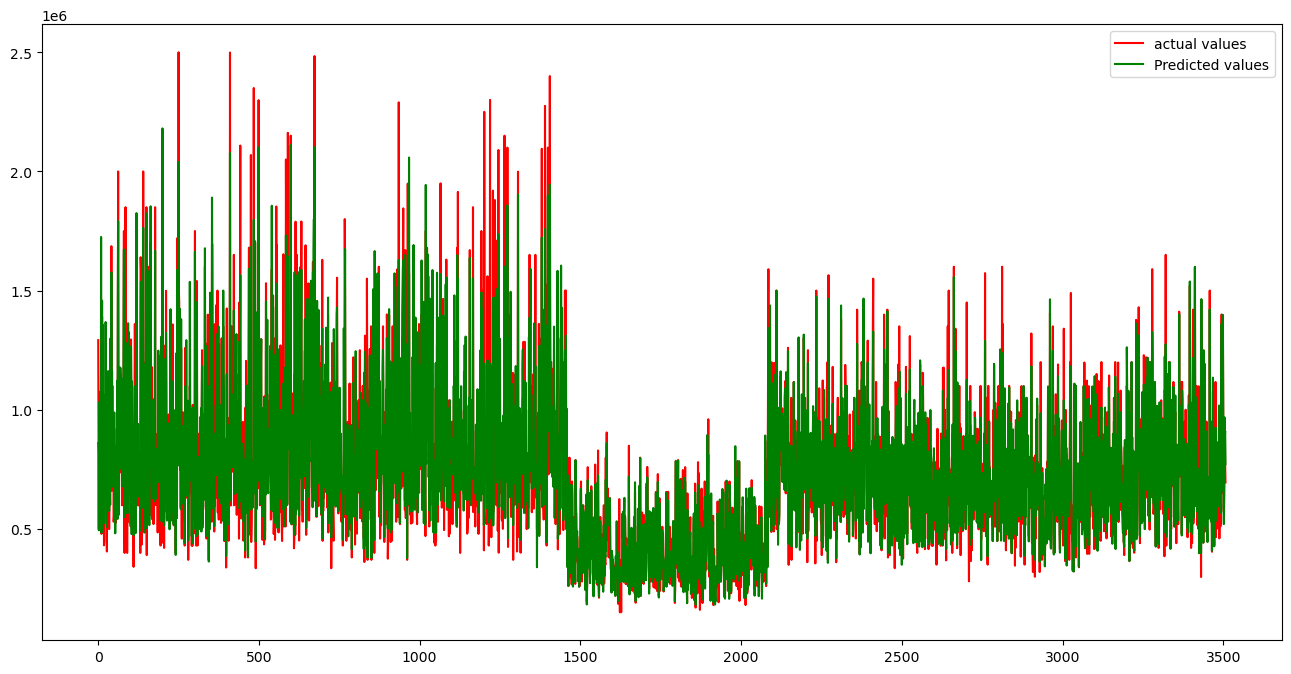

------------------------------------------------------------------------
Training for fold 5 ...


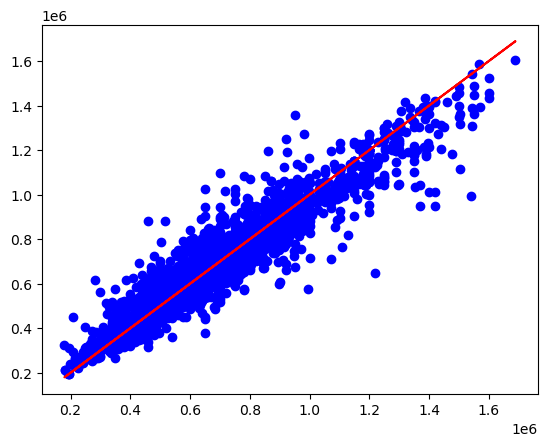

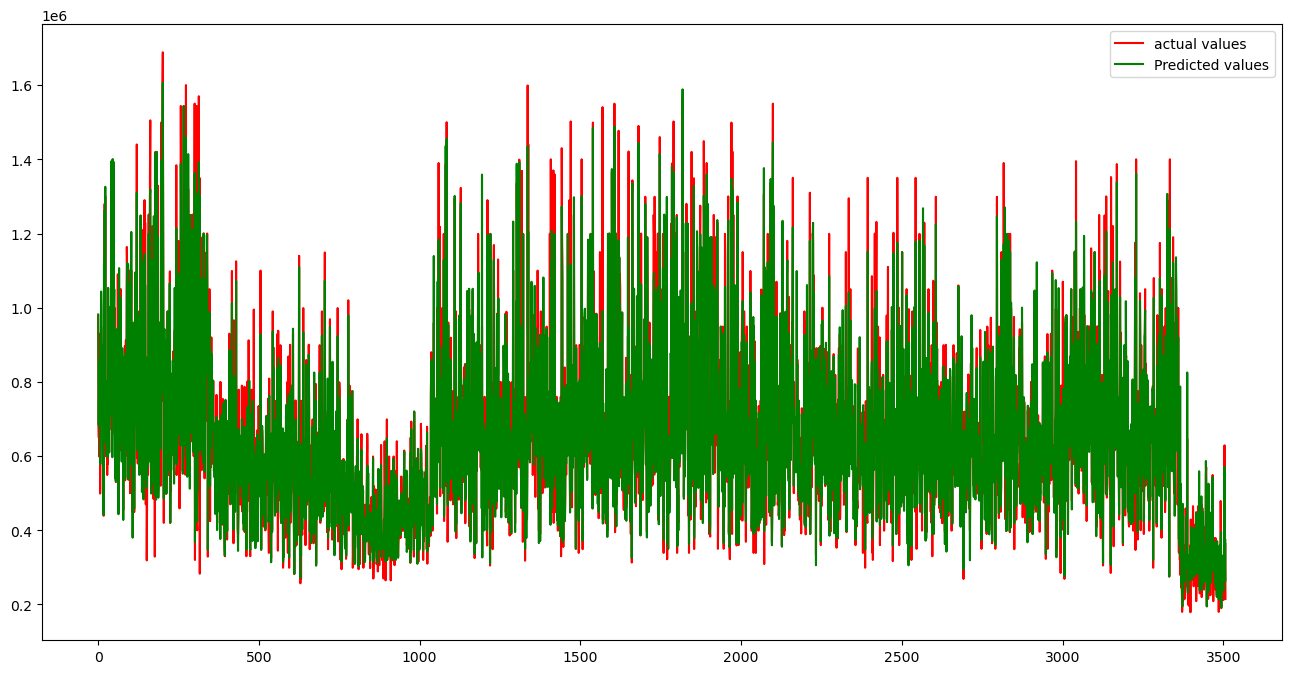

------------------------------------------------------------------------
Training for fold 6 ...


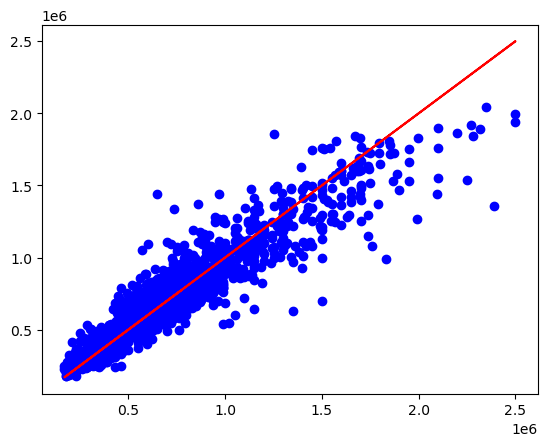

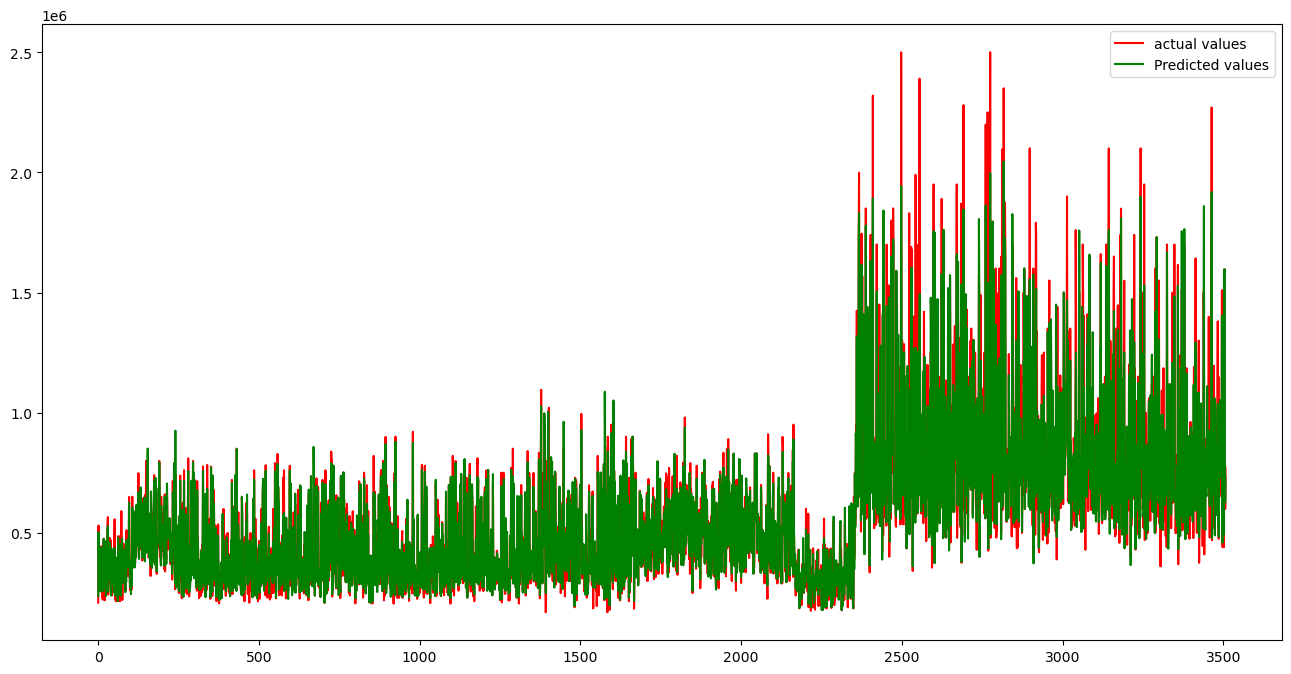

------------------------------------------------------------------------
Training for fold 7 ...


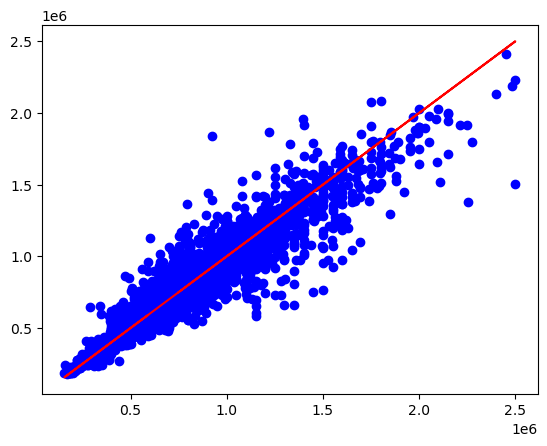

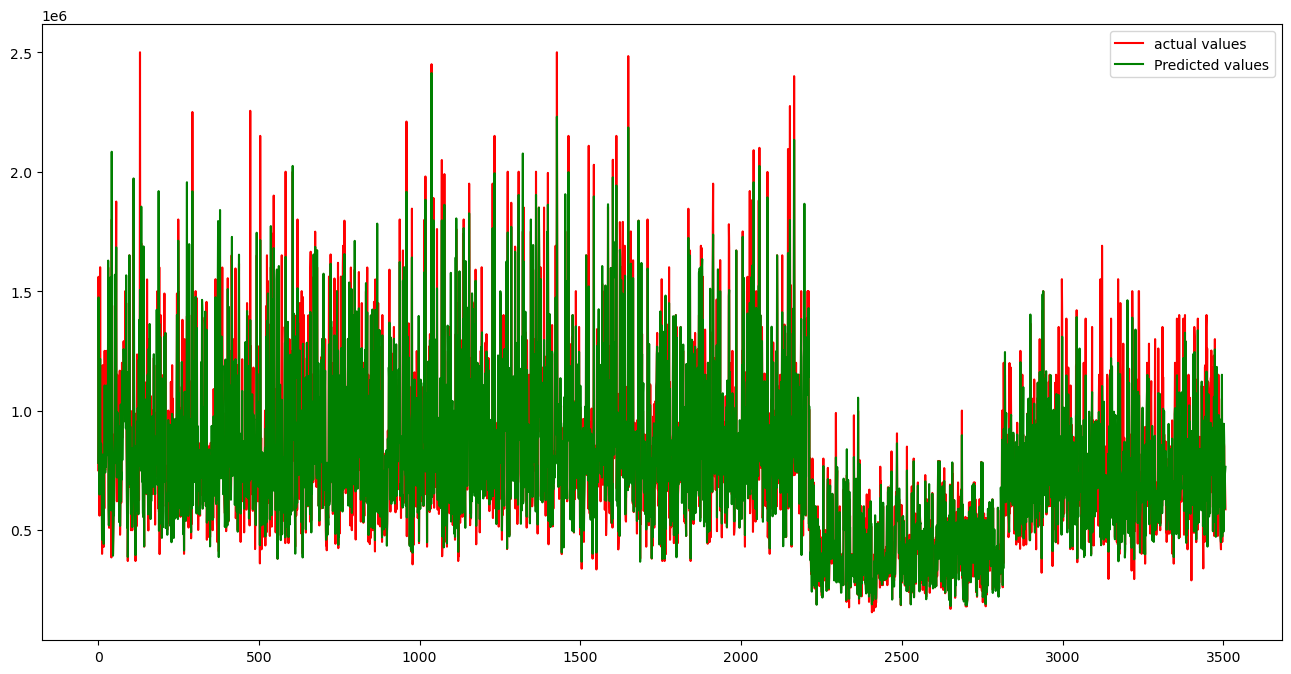

------------------------------------------------------------------------
Training for fold 8 ...


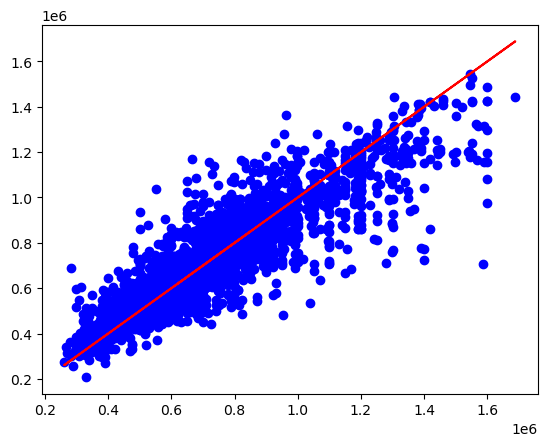

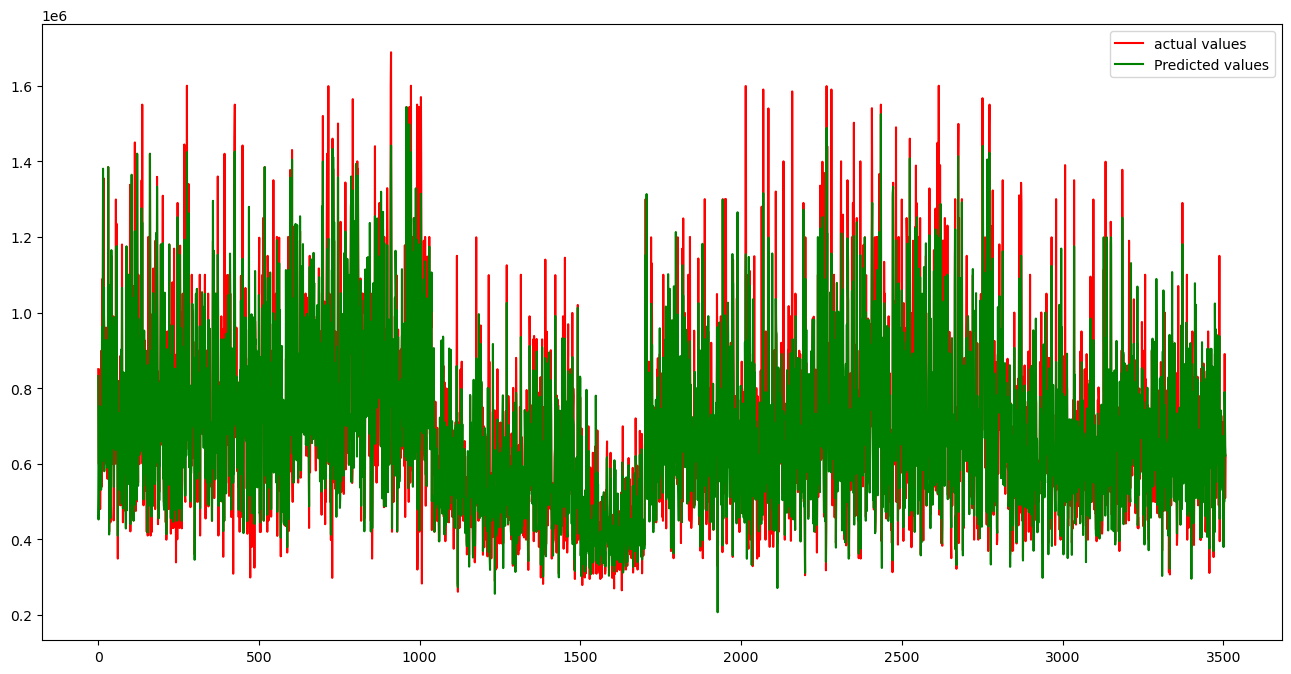

------------------------------------------------------------------------
Training for fold 9 ...


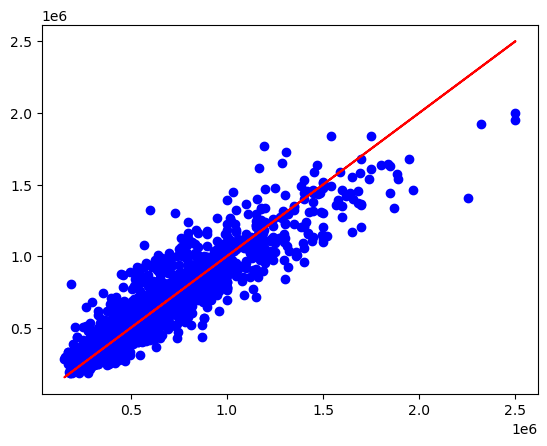

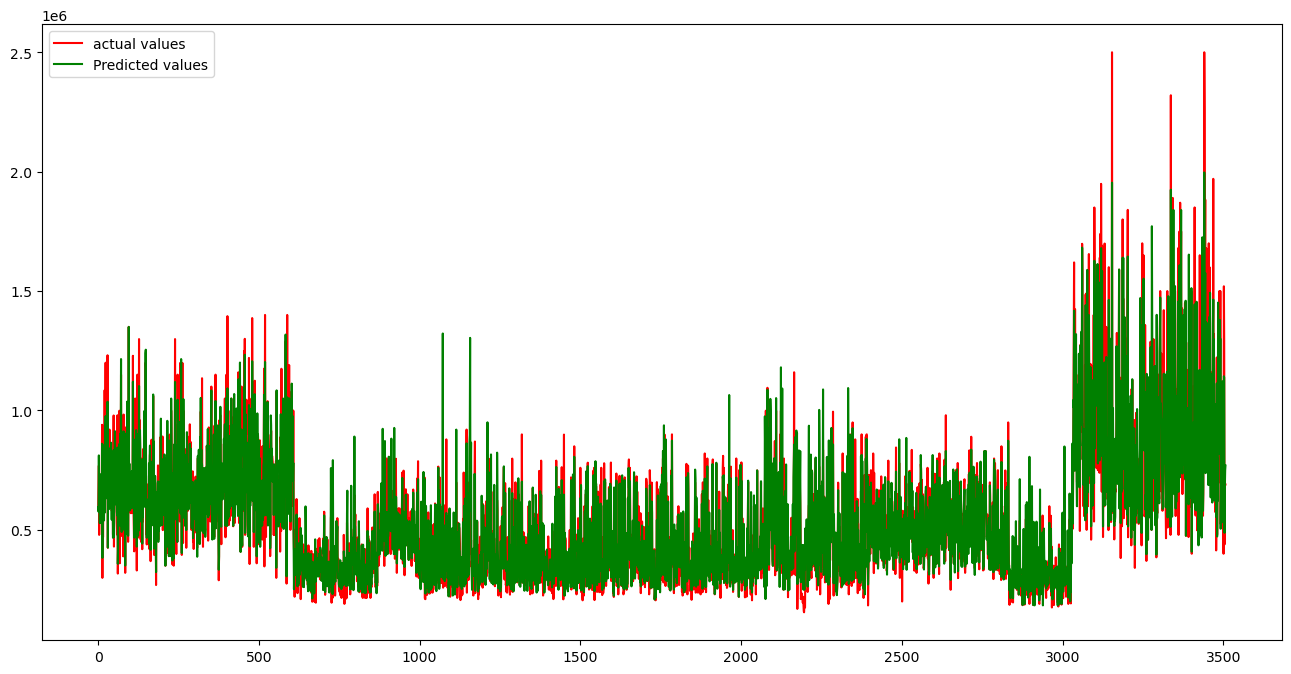

------------------------------------------------------------------------
Training for fold 10 ...


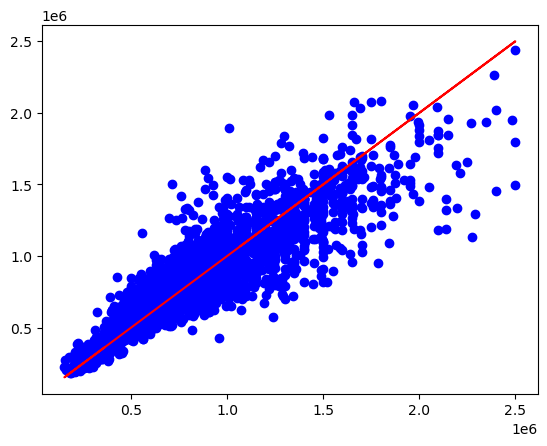

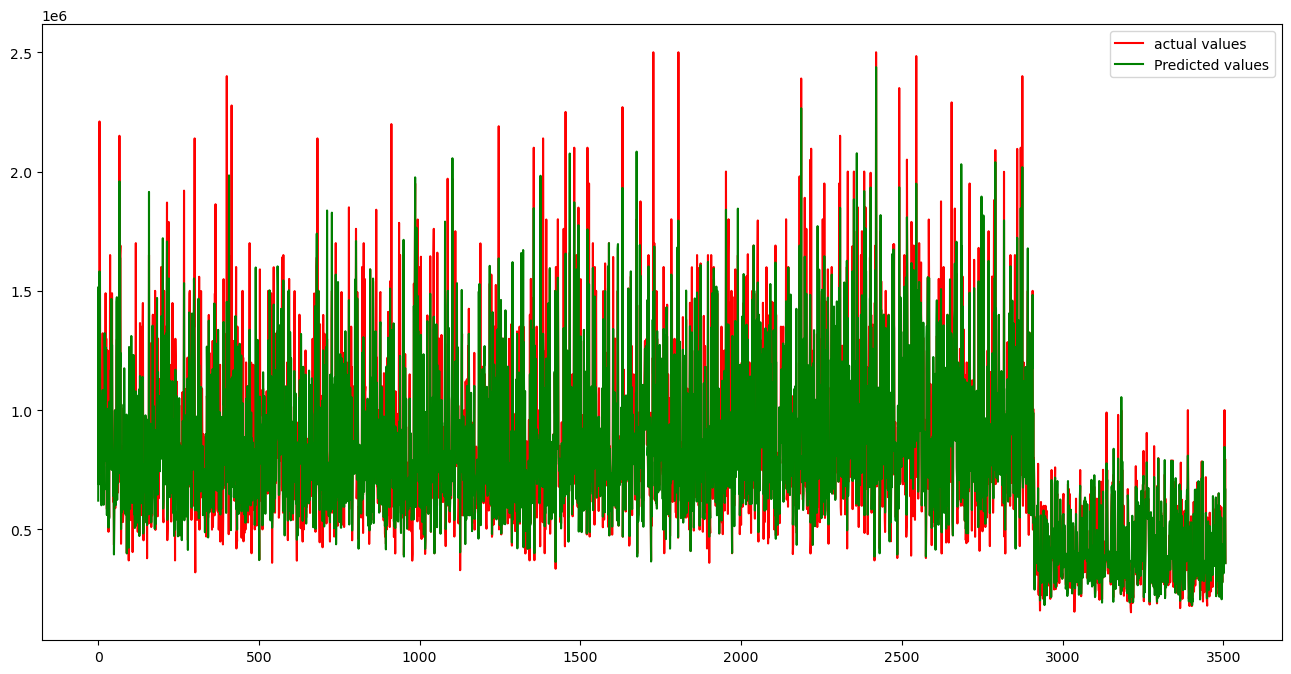

In [11]:
n_neighbors = 3
fold_no = 1
stats = []
for train, test in kfold.split(features, labels):
    model = neighbors.KNeighborsRegressor(n_neighbors, weights='distance')
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    model.fit(features[train], labels[train])
    preds_house = model.predict(features[test])
    stats.append([mean_percent_error(model, features[test], labels[test])[0], mean_abs_error(model, features[test], labels[test])[0]])
    plt.plot(labels[test], preds_house, 'bo')
    plt.plot(labels[test], labels[test], 'r-')
    plt.show()
    # fitting the size of the plot
    plt.figure(figsize=(16, 8))
    # plotting the graphs
    plt.plot([i for i in range(len(test))],labels[test], label="actual values", c='r')
    plt.plot([i for i in range(len(test))],preds_house, label="Predicted values", c='g')
    # showing the plotting
    plt.legend()
    plt.show()
    fold_no = fold_no + 1

In [12]:
stats_df = pd.DataFrame(stats)
stats_df

0              1
0  0.116946   74974.072035
1  0.112938   61740.975735
2  0.132793   91182.225818
3  0.108664   80073.491874
4  0.074959   47524.167426
5  0.089537   54108.507301
6  0.094080   76465.925418
7  0.106180   74298.964147
8  0.118035   61955.405960
9  0.124880  104016.704513

In [13]:
stats_df.describe()

0              1
count  10.000000      10.000000
mean    0.107901   72634.044023
std     0.017432   17041.050039
min     0.074959   47524.167426
25%     0.097105   61794.583291
50%     0.110801   74636.518091
75%     0.117763   79171.600260
max     0.132793  104016.704513